In [1]:
batch_size = 20
seq_len = 30
dim = 5

from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR
logger = getLogger("pygan")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [2]:
from pygan.truesampler.sine_wave_true_sampler import SineWaveTrueSampler

In [3]:
true_sampler = SineWaveTrueSampler(
    batch_size=batch_size,
    seq_len=seq_len,
    dim=dim
)

In [4]:
true_sampler.draw().shape

(20, 30, 5)

In [5]:
true_arr = true_sampler.draw()

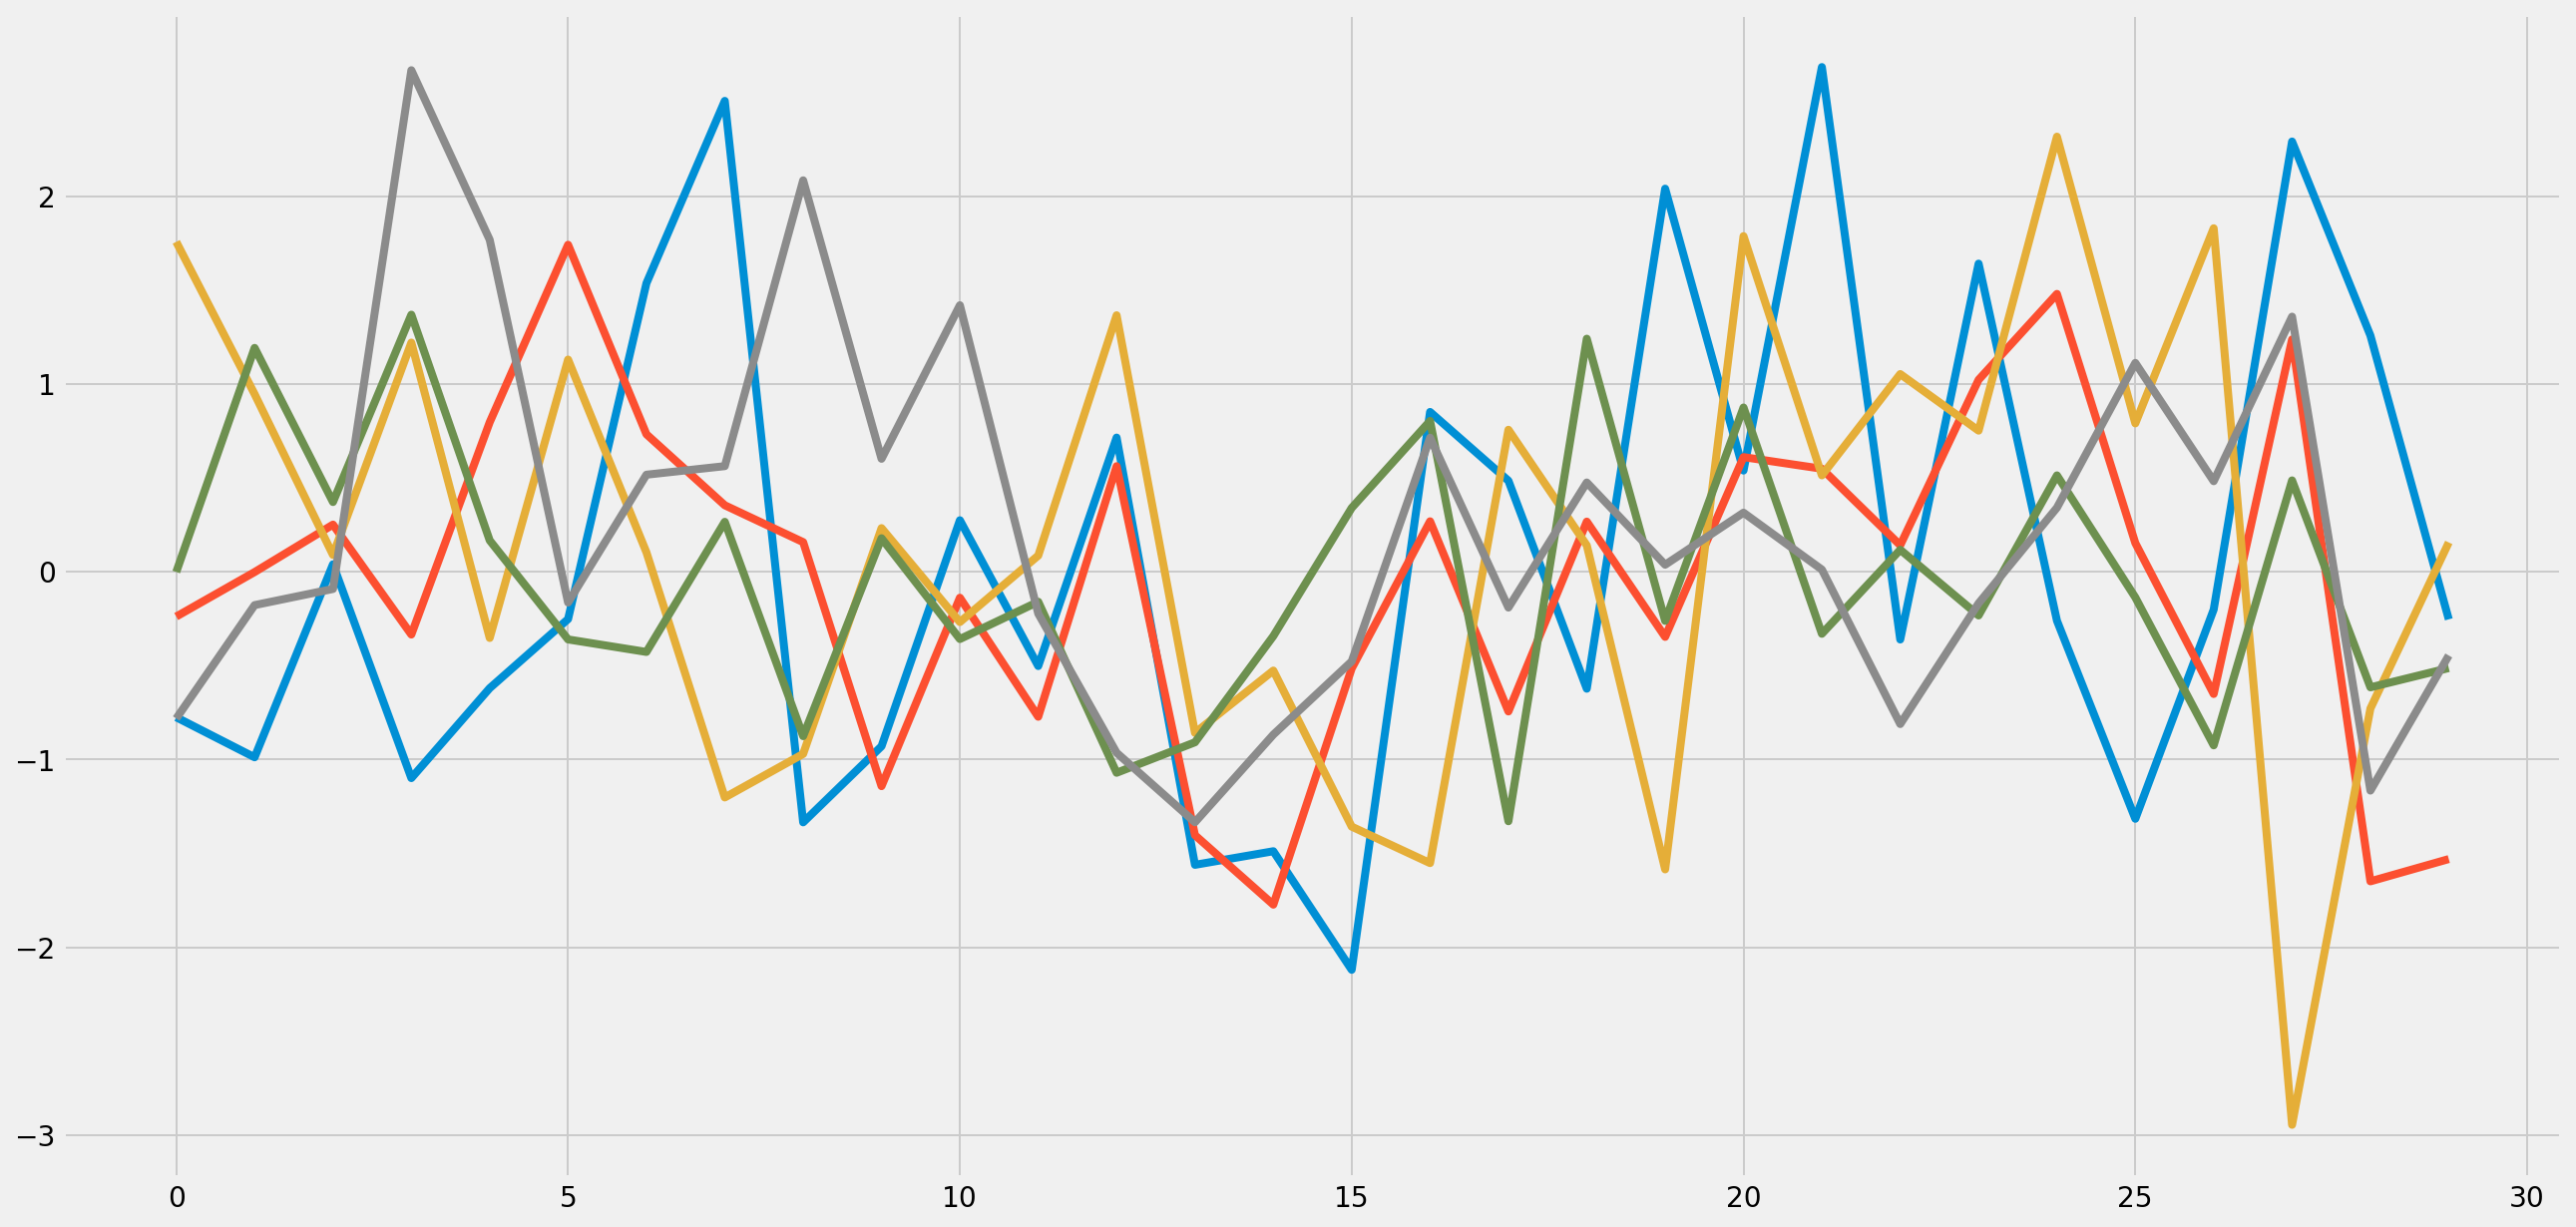

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20, 10))

plt.plot(true_arr[0])
plt.show()

In [7]:
from pygan.noisesampler.uniform_noise_sampler import UniformNoiseSampler

In [8]:
noise_sampler = UniformNoiseSampler(low=-1, high=1, output_shape=(batch_size, 1, dim))

In [9]:
noise_sampler.generate().shape

(20, 1, 5)

In [10]:
from pygan.generativemodel.lstm_model import LSTMModel

In [11]:
generative_model = LSTMModel(
    batch_size=batch_size,
    seq_len=seq_len,
    input_neuron_count=dim,
    hidden_neuron_count=dim
)

In [12]:
generative_model.noise_sampler = noise_sampler

In [13]:
generative_model.draw().shape

(20, 30, 5)

In [14]:
generated_arr = generative_model.draw()

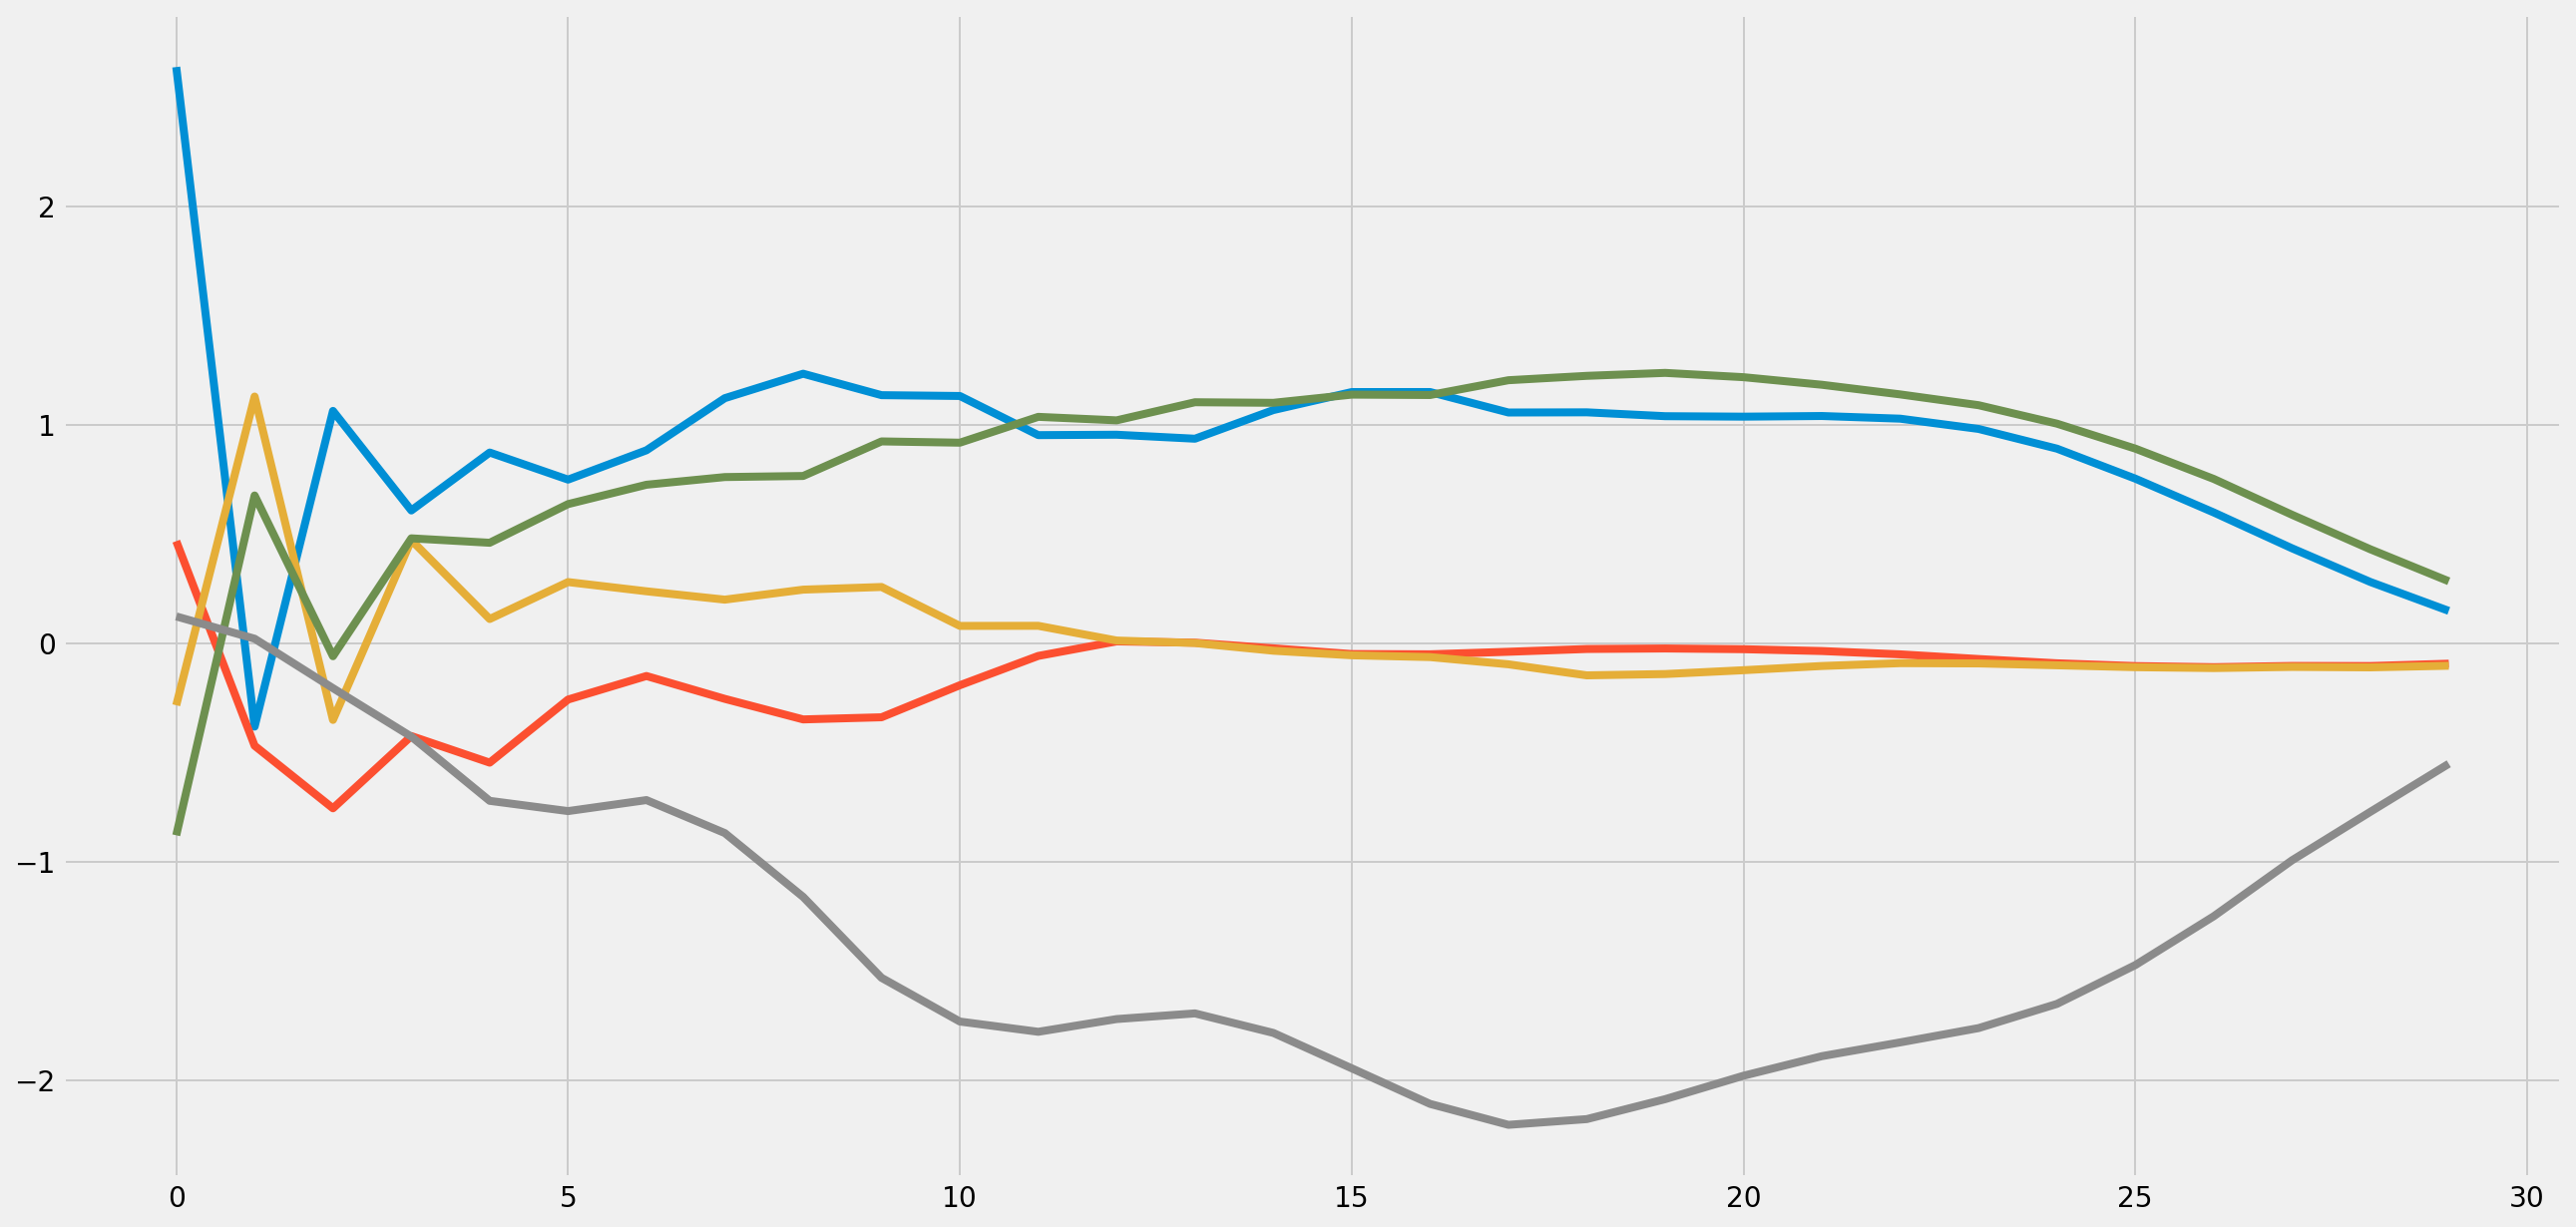

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20, 10))

plt.plot(generated_arr[0])
plt.show()

In [16]:
from pygan.discriminativemodel.nn_model import NNModel

In [17]:
from pydbm.synapse.nn_graph import NNGraph
from pydbm.nn.nn_layer import NNLayer
from pydbm.activation.logistic_function import LogisticFunction

nn_layer = NNLayer(
    graph=NNGraph(
        activation_function=LogisticFunction(),
        hidden_neuron_count=seq_len * dim,
        output_neuron_count=1
    )
)

discriminative_model = NNModel(
    nn_layer_list=[nn_layer],
    batch_size=batch_size
)

In [18]:
from pygan.gansvaluefunction.mini_max import MiniMax

In [19]:
gans_value_function = MiniMax()

In [20]:
from pygan.generative_adversarial_networks import GenerativeAdversarialNetworks

In [21]:
GAN = GenerativeAdversarialNetworks(gans_value_function=gans_value_function)

In [22]:
generative_model, discriminative_model = GAN.train(
    true_sampler,
    generative_model,
    discriminative_model,
    iter_n=100,
    k_step=10
)

----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.148441934112223
And update the `discriminator` by descending its stochastic gradient(means): -2.7712440069994893
Probability inferenced by the `discriminator` (mean): 0.6925943943083213
And update the `discriminator` by descending its stochastic gradient(means): -3.9303334612442073
Probability inferenced by the `discriminator` (mean): 0.6803783715014147
And update the `discriminator` by descending its stochastic gradient(means): -3.6499788373936695
Probability inferenced by the `discriminator` (mean): 0.233925321645108
And update the `discriminator` by descending its stochastic gradient(means): -2.471896977005287
Probability inferenced by the `discriminator` (mean): 0.7446165492790213
And update the `disc

Probability inferenced by the `discriminator` (mean): 0.2110837282637792
And update the `discriminator` by descending its stochastic gradient(means): -3.212104448062372
Probability inferenced by the `discriminator` (mean): 0.16295624670894643
And update the `discriminator` by descending its stochastic gradient(means): -2.596376546061829
Probability inferenced by the `discriminator` (mean): 0.11650095415186398
And update the `discriminator` by descending its stochastic gradient(means): -2.658913189641416
Probability inferenced by the `discriminator` (mean): 0.7116924024784999
And update the `discriminator` by descending its stochastic gradient(means): -3.890688538613099
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.2677773697014658
And update the `generat

Probability inferenced by the `discriminator` (mean): 0.6582385850094257
And update the `discriminator` by descending its stochastic gradient(means): -3.946452404549331
Probability inferenced by the `discriminator` (mean): 0.3817422191852702
And update the `discriminator` by descending its stochastic gradient(means): -3.017154804641084
Probability inferenced by the `discriminator` (mean): 0.3028954784290397
And update the `discriminator` by descending its stochastic gradient(means): -2.9463907964883025
Probability inferenced by the `discriminator` (mean): 0.2900665096937649
And update the `discriminator` by descending its stochastic gradient(means): -2.9973149650720776
Probability inferenced by the `discriminator` (mean): 0.3104697430963444
And update the `discriminator` by descending its stochastic gradient(means): -2.795992679062256
Probability inferenced by the `discriminator` (mean): 0.2500790450804018
And update the `discriminator` by descending its stochastic gradient(means): -2.

And update the `discriminator` by descending its stochastic gradient(means): -3.597873302600024
Probability inferenced by the `discriminator` (mean): 0.3390297946483274
And update the `discriminator` by descending its stochastic gradient(means): -2.881060352214722
Probability inferenced by the `discriminator` (mean): 0.40677977156882167
And update the `discriminator` by descending its stochastic gradient(means): -3.3737074917206584
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.3284674443504126
And update the `generator` by descending its stochastic gradient(means): 1.4778313516998842e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------

Probability inferenced by the `discriminator` (mean): 0.2797694686316327
And update the `discriminator` by descending its stochastic gradient(means): -3.0869929160376435
Probability inferenced by the `discriminator` (mean): 0.32135679623211455
And update the `discriminator` by descending its stochastic gradient(means): -2.9064483842220215
Probability inferenced by the `discriminator` (mean): 0.3262068056093311
And update the `discriminator` by descending its stochastic gradient(means): -3.5054900714321517
Probability inferenced by the `discriminator` (mean): 0.28535636950837806
And update the `discriminator` by descending its stochastic gradient(means): -3.330921561823806
Probability inferenced by the `discriminator` (mean): 0.30434341578129587
And update the `discriminator` by descending its stochastic gradient(means): -2.7002204112394788
Probability inferenced by the `discriminator` (mean): 0.3106260157346206
And update the `discriminator` by descending its stochastic gradient(means)

And update the `discriminator` by descending its stochastic gradient(means): -2.353462315050603
Probability inferenced by the `discriminator` (mean): 0.3617257471191512
And update the `discriminator` by descending its stochastic gradient(means): -3.955343310562802
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.13856366161402445
And update the `generator` by descending its stochastic gradient(means): 8.543293543763042e-07
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.1988471225046312
And update the `discriminator` by des

Probability inferenced by the `discriminator` (mean): 0.49672624547564304
And update the `discriminator` by descending its stochastic gradient(means): -3.660734408076285
Probability inferenced by the `discriminator` (mean): 0.2292239571004639
And update the `discriminator` by descending its stochastic gradient(means): -2.698407161225746
Probability inferenced by the `discriminator` (mean): 0.2916959724338666
And update the `discriminator` by descending its stochastic gradient(means): -3.274866796885213
Probability inferenced by the `discriminator` (mean): 0.4086206043902796
And update the `discriminator` by descending its stochastic gradient(means): -3.0589205631584337
Probability inferenced by the `discriminator` (mean): 0.3210459262360981
And update the `discriminator` by descending its stochastic gradient(means): -3.2561104027788845
Probability inferenced by the `discriminator` (mean): 0.36924156017104204
And update the `discriminator` by descending its stochastic gradient(means): -

And update the `discriminator` by descending its stochastic gradient(means): -3.3257686548272125
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.31516035015706045
And update the `generator` by descending its stochastic gradient(means): 1.990364939334161e-06
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.25829271610324855
And update the `discriminator` by descending its stochastic gradient(means): -3.0075757708513753
Probability inferenced by the `discriminator` (mean): 0.3386714868818169
And update the `discriminator` by 

Probability inferenced by the `discriminator` (mean): 0.4817699648449702
And update the `discriminator` by descending its stochastic gradient(means): -3.412359408600391
Probability inferenced by the `discriminator` (mean): 0.4559121935059068
And update the `discriminator` by descending its stochastic gradient(means): -3.2156474932695267
Probability inferenced by the `discriminator` (mean): 0.44080387522112546
And update the `discriminator` by descending its stochastic gradient(means): -3.6252813871760976
Probability inferenced by the `discriminator` (mean): 0.5316087565675408
And update the `discriminator` by descending its stochastic gradient(means): -3.3437051512673586
Probability inferenced by the `discriminator` (mean): 0.3476753862525238
And update the `discriminator` by descending its stochastic gradient(means): -2.9948301882006123
Probability inferenced by the `discriminator` (mean): 0.445813592482295
And update the `discriminator` by descending its stochastic gradient(means): -

The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.3892673914209809
And update the `generator` by descending its stochastic gradient(means): 1.0685471627242008e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.3535559991606781
And update the `discriminator` by descending its stochastic gradient(means): -3.118002337598696
Probability inferenced by the `discriminator` (mean): 0.43052610651186524
And update the `discriminator` by descending its stochastic gradient(means): -2.98520759082841
Probability inferenced by the `discriminator` (mean): 0.27372650667461074
And update the `discriminator` by descending its stochastic grad

And update the `discriminator` by descending its stochastic gradient(means): -3.548888924165081
Probability inferenced by the `discriminator` (mean): 0.2785652284647705
And update the `discriminator` by descending its stochastic gradient(means): -2.5439762866142943
Probability inferenced by the `discriminator` (mean): 0.4206158244484218
And update the `discriminator` by descending its stochastic gradient(means): -3.142771198544659
Probability inferenced by the `discriminator` (mean): 0.5095061846493343
And update the `discriminator` by descending its stochastic gradient(means): -3.6876949659617773
Probability inferenced by the `discriminator` (mean): 0.37379915037018074
And update the `discriminator` by descending its stochastic gradient(means): -3.453385100228086
Probability inferenced by the `discriminator` (mean): 0.3191208875455872
And update the `discriminator` by descending its stochastic gradient(means): -3.07699642757319
---------------------------------------------------------

And update the `generator` by descending its stochastic gradient(means): 1.9514535436346746e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.6129406492682478
And update the `discriminator` by descending its stochastic gradient(means): -3.6330281091091465
Probability inferenced by the `discriminator` (mean): 0.6837640383174162
And update the `discriminator` by descending its stochastic gradient(means): -3.939945111562794
Probability inferenced by the `discriminator` (mean): 0.47095479803542845
And update the `discriminator` by descending its stochastic gradient(means): -3.278037798695363
Probability inferenced by the `discriminator` (mean): 0.4266132193506415
And update the `discriminator` by descending its stochastic gradient(means): -3.440289907090

And update the `discriminator` by descending its stochastic gradient(means): -3.4278169853549016
Probability inferenced by the `discriminator` (mean): 0.45017576693215783
And update the `discriminator` by descending its stochastic gradient(means): -3.5406938603202804
Probability inferenced by the `discriminator` (mean): 0.5471984141453545
And update the `discriminator` by descending its stochastic gradient(means): -3.486898163316547
Probability inferenced by the `discriminator` (mean): 0.36045993100756724
And update the `discriminator` by descending its stochastic gradient(means): -3.0021953477553445
Probability inferenced by the `discriminator` (mean): 0.4046670240469422
And update the `discriminator` by descending its stochastic gradient(means): -3.1653163561802478
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
-------------------------------------------------------------------------------------------------

The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.2509744467329764
And update the `discriminator` by descending its stochastic gradient(means): -2.850043468693852
Probability inferenced by the `discriminator` (mean): 0.34674682587273387
And update the `discriminator` by descending its stochastic gradient(means): -3.2053573990373265
Probability inferenced by the `discriminator` (mean): 0.3925437422175739
And update the `discriminator` by descending its stochastic gradient(means): -3.4324106558698753
Probability inferenced by the `discriminator` (mean): 0.4096667354252893
And update the `discriminator` by descending its stochastic gradient(means): -3.0303663686775266
Probability inferenced by the `discriminator` (mean): 0.4632103736485275
And update the `discriminator` by descending its stochastic gradient(means): -3.7437595647516693
Probability inference

Probability inferenced by the `discriminator` (mean): 0.3759660029234916
And update the `discriminator` by descending its stochastic gradient(means): -3.5516844953538618
Probability inferenced by the `discriminator` (mean): 0.3950452122955885
And update the `discriminator` by descending its stochastic gradient(means): -3.33127693989531
Probability inferenced by the `discriminator` (mean): 0.4225023843676638
And update the `discriminator` by descending its stochastic gradient(means): -3.032217859770435
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4676974344175321
And update the `generator` by descending its stochastic gradient(means): 2.7782796769575003e-05
--------------------------------------------------------------------------------------------------

Probability inferenced by the `discriminator` (mean): 0.5238372322494798
And update the `discriminator` by descending its stochastic gradient(means): -3.19481400583471
Probability inferenced by the `discriminator` (mean): 0.5218588370617591
And update the `discriminator` by descending its stochastic gradient(means): -3.425155378533172
Probability inferenced by the `discriminator` (mean): 0.48288462075396577
And update the `discriminator` by descending its stochastic gradient(means): -3.3718612259687597
Probability inferenced by the `discriminator` (mean): 0.46085709423804466
And update the `discriminator` by descending its stochastic gradient(means): -3.482275681826775
Probability inferenced by the `discriminator` (mean): 0.5748678626571306
And update the `discriminator` by descending its stochastic gradient(means): -3.796193602213927
Probability inferenced by the `discriminator` (mean): 0.5211409246338636
And update the `discriminator` by descending its stochastic gradient(means): -3.

And update the `discriminator` by descending its stochastic gradient(means): -3.3171776632216234
Probability inferenced by the `discriminator` (mean): 0.4222926511094779
And update the `discriminator` by descending its stochastic gradient(means): -2.9683363302030603
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.5031546055371672
And update the `generator` by descending its stochastic gradient(means): 3.305748795536249e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.465202387306357
And update the `discriminator` by des

And update the `discriminator` by descending its stochastic gradient(means): -3.531683624308905
Probability inferenced by the `discriminator` (mean): 0.6559611801427858
And update the `discriminator` by descending its stochastic gradient(means): -4.284893528967984
Probability inferenced by the `discriminator` (mean): 0.5068060508060714
And update the `discriminator` by descending its stochastic gradient(means): -3.8406671158929044
Probability inferenced by the `discriminator` (mean): 0.5568361018210589
And update the `discriminator` by descending its stochastic gradient(means): -3.5639757826796474
Probability inferenced by the `discriminator` (mean): 0.5178815584087582
And update the `discriminator` by descending its stochastic gradient(means): -3.1350891166422823
Probability inferenced by the `discriminator` (mean): 0.6572296058300123
And update the `discriminator` by descending its stochastic gradient(means): -3.736596719717775
Probability inferenced by the `discriminator` (mean): 0.

----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.45164480312232297
And update the `generator` by descending its stochastic gradient(means): 3.106871489284588e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.28857561458823827
And update the `discriminator` by descending its stochastic gradient(means): -3.073982786677012
Probability inferenced by the `discriminator` (mean): 0.46497221074285144
And update the `discriminator` by descending its stochastic gradient(means): -3.185043821492468
Probability inferenced by the `disc

Probability inferenced by the `discriminator` (mean): 0.3142294535236442
And update the `discriminator` by descending its stochastic gradient(means): -3.1263102543729957
Probability inferenced by the `discriminator` (mean): 0.48859051756971894
And update the `discriminator` by descending its stochastic gradient(means): -3.1601795824559282
Probability inferenced by the `discriminator` (mean): 0.44912844591646717
And update the `discriminator` by descending its stochastic gradient(means): -3.5876875701671893
Probability inferenced by the `discriminator` (mean): 0.4906023935203277
And update the `discriminator` by descending its stochastic gradient(means): -3.3716548844529277
Probability inferenced by the `discriminator` (mean): 0.29597339796431554
And update the `discriminator` by descending its stochastic gradient(means): -2.8729406818152277
Probability inferenced by the `discriminator` (mean): 0.4548788118999805
And update the `discriminator` by descending its stochastic gradient(means

Probability inferenced by the `discriminator` (mean): 0.46791730693362704
And update the `generator` by descending its stochastic gradient(means): 2.7174737689189354e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.5287687859914809
And update the `discriminator` by descending its stochastic gradient(means): -3.2255925742115457
Probability inferenced by the `discriminator` (mean): 0.48265786880840106
And update the `discriminator` by descending its stochastic gradient(means): -3.3039087183551756
Probability inferenced by the `discriminator` (mean): 0.32139432087663816
And update the `discriminator` by descending its stochastic gradient(means): -2.8185591436891713
Probability inferenced by the `discriminator` (mean): 0.460317928908166
And update the `

Probability inferenced by the `discriminator` (mean): 0.45808155661385036
And update the `discriminator` by descending its stochastic gradient(means): -3.19579681116699
Probability inferenced by the `discriminator` (mean): 0.43476209292548773
And update the `discriminator` by descending its stochastic gradient(means): -3.7809356584858946
Probability inferenced by the `discriminator` (mean): 0.6397697887114905
And update the `discriminator` by descending its stochastic gradient(means): -3.914446583202872
Probability inferenced by the `discriminator` (mean): 0.4791387842442439
And update the `discriminator` by descending its stochastic gradient(means): -3.430547880710197
Probability inferenced by the `discriminator` (mean): 0.38660800914342486
And update the `discriminator` by descending its stochastic gradient(means): -3.4491789594896347
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
--------------------------

----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.48544384516412187
And update the `discriminator` by descending its stochastic gradient(means): -3.235905947315943
Probability inferenced by the `discriminator` (mean): 0.47220834755461005
And update the `discriminator` by descending its stochastic gradient(means): -3.428908525273458
Probability inferenced by the `discriminator` (mean): 0.4318352882558
And update the `discriminator` by descending its stochastic gradient(means): -3.5382860812926538
Probability inferenced by the `discriminator` (mean): 0.40143992538111606
And update the `discriminator` by descending its stochastic gradient(means): -2.7710960206409943
Probability inferenced by the `discriminator` (mean): 0.4199547630297865
And update the `dis

Probability inferenced by the `discriminator` (mean): 0.29161260196089656
And update the `discriminator` by descending its stochastic gradient(means): -3.5457579924941767
Probability inferenced by the `discriminator` (mean): 0.5336341478408142
And update the `discriminator` by descending its stochastic gradient(means): -3.244898514904821
Probability inferenced by the `discriminator` (mean): 0.30193847920852407
And update the `discriminator` by descending its stochastic gradient(means): -3.2133358778724848
Probability inferenced by the `discriminator` (mean): 0.46685837981761624
And update the `discriminator` by descending its stochastic gradient(means): -3.202014908081111
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4595505765922964
And update the `gene

Probability inferenced by the `discriminator` (mean): 0.3618620996578886
And update the `discriminator` by descending its stochastic gradient(means): -3.0951458497973
Probability inferenced by the `discriminator` (mean): 0.5103286802261416
And update the `discriminator` by descending its stochastic gradient(means): -3.333273210254293
Probability inferenced by the `discriminator` (mean): 0.4367162512731097
And update the `discriminator` by descending its stochastic gradient(means): -3.1305476877995586
Probability inferenced by the `discriminator` (mean): 0.5074445674603549
And update the `discriminator` by descending its stochastic gradient(means): -4.15202147537281
Probability inferenced by the `discriminator` (mean): 0.3976817540489802
And update the `discriminator` by descending its stochastic gradient(means): -3.079994489285601
Probability inferenced by the `discriminator` (mean): 0.4109466935418289
And update the `discriminator` by descending its stochastic gradient(means): -3.2917

And update the `discriminator` by descending its stochastic gradient(means): -3.678412884382947
Probability inferenced by the `discriminator` (mean): 0.46037864852913984
And update the `discriminator` by descending its stochastic gradient(means): -3.4888316058106503
Probability inferenced by the `discriminator` (mean): 0.45680957974262865
And update the `discriminator` by descending its stochastic gradient(means): -3.3117415136661634
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4630630150382159
And update the `generator` by descending its stochastic gradient(means): 1.5453937761998546e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
--------------------------------------

Probability inferenced by the `discriminator` (mean): 0.46446483089964774
And update the `discriminator` by descending its stochastic gradient(means): -3.4396394111782826
Probability inferenced by the `discriminator` (mean): 0.3628060493831614
And update the `discriminator` by descending its stochastic gradient(means): -3.0065676506655334
Probability inferenced by the `discriminator` (mean): 0.5200263004259542
And update the `discriminator` by descending its stochastic gradient(means): -3.197023273483639
Probability inferenced by the `discriminator` (mean): 0.3760023037196027
And update the `discriminator` by descending its stochastic gradient(means): -3.48172058450763
Probability inferenced by the `discriminator` (mean): 0.4914386171797263
And update the `discriminator` by descending its stochastic gradient(means): -3.8899843413321555
Probability inferenced by the `discriminator` (mean): 0.38988118051104814
And update the `discriminator` by descending its stochastic gradient(means): -

And update the `discriminator` by descending its stochastic gradient(means): -3.216418683426766
Probability inferenced by the `discriminator` (mean): 0.3777287136740346
And update the `discriminator` by descending its stochastic gradient(means): -3.2680971743971505
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.35600693416828055
And update the `generator` by descending its stochastic gradient(means): 5.319969485007026e-06
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4299645732020303
And update the `discriminator` by de

Probability inferenced by the `discriminator` (mean): 0.41896576371179844
And update the `discriminator` by descending its stochastic gradient(means): -3.056951229810135
Probability inferenced by the `discriminator` (mean): 0.5026028576847937
And update the `discriminator` by descending its stochastic gradient(means): -3.4821758193656516
Probability inferenced by the `discriminator` (mean): 0.33641701194051027
And update the `discriminator` by descending its stochastic gradient(means): -2.7096717605246017
Probability inferenced by the `discriminator` (mean): 0.3560647573796583
And update the `discriminator` by descending its stochastic gradient(means): -3.668518150504822
Probability inferenced by the `discriminator` (mean): 0.38467453405515645
And update the `discriminator` by descending its stochastic gradient(means): -3.307038045602937
Probability inferenced by the `discriminator` (mean): 0.5740983943274076
And update the `discriminator` by descending its stochastic gradient(means): 

In [23]:
d_logs_list, g_logs_list = GAN.extract_logs_tuple()

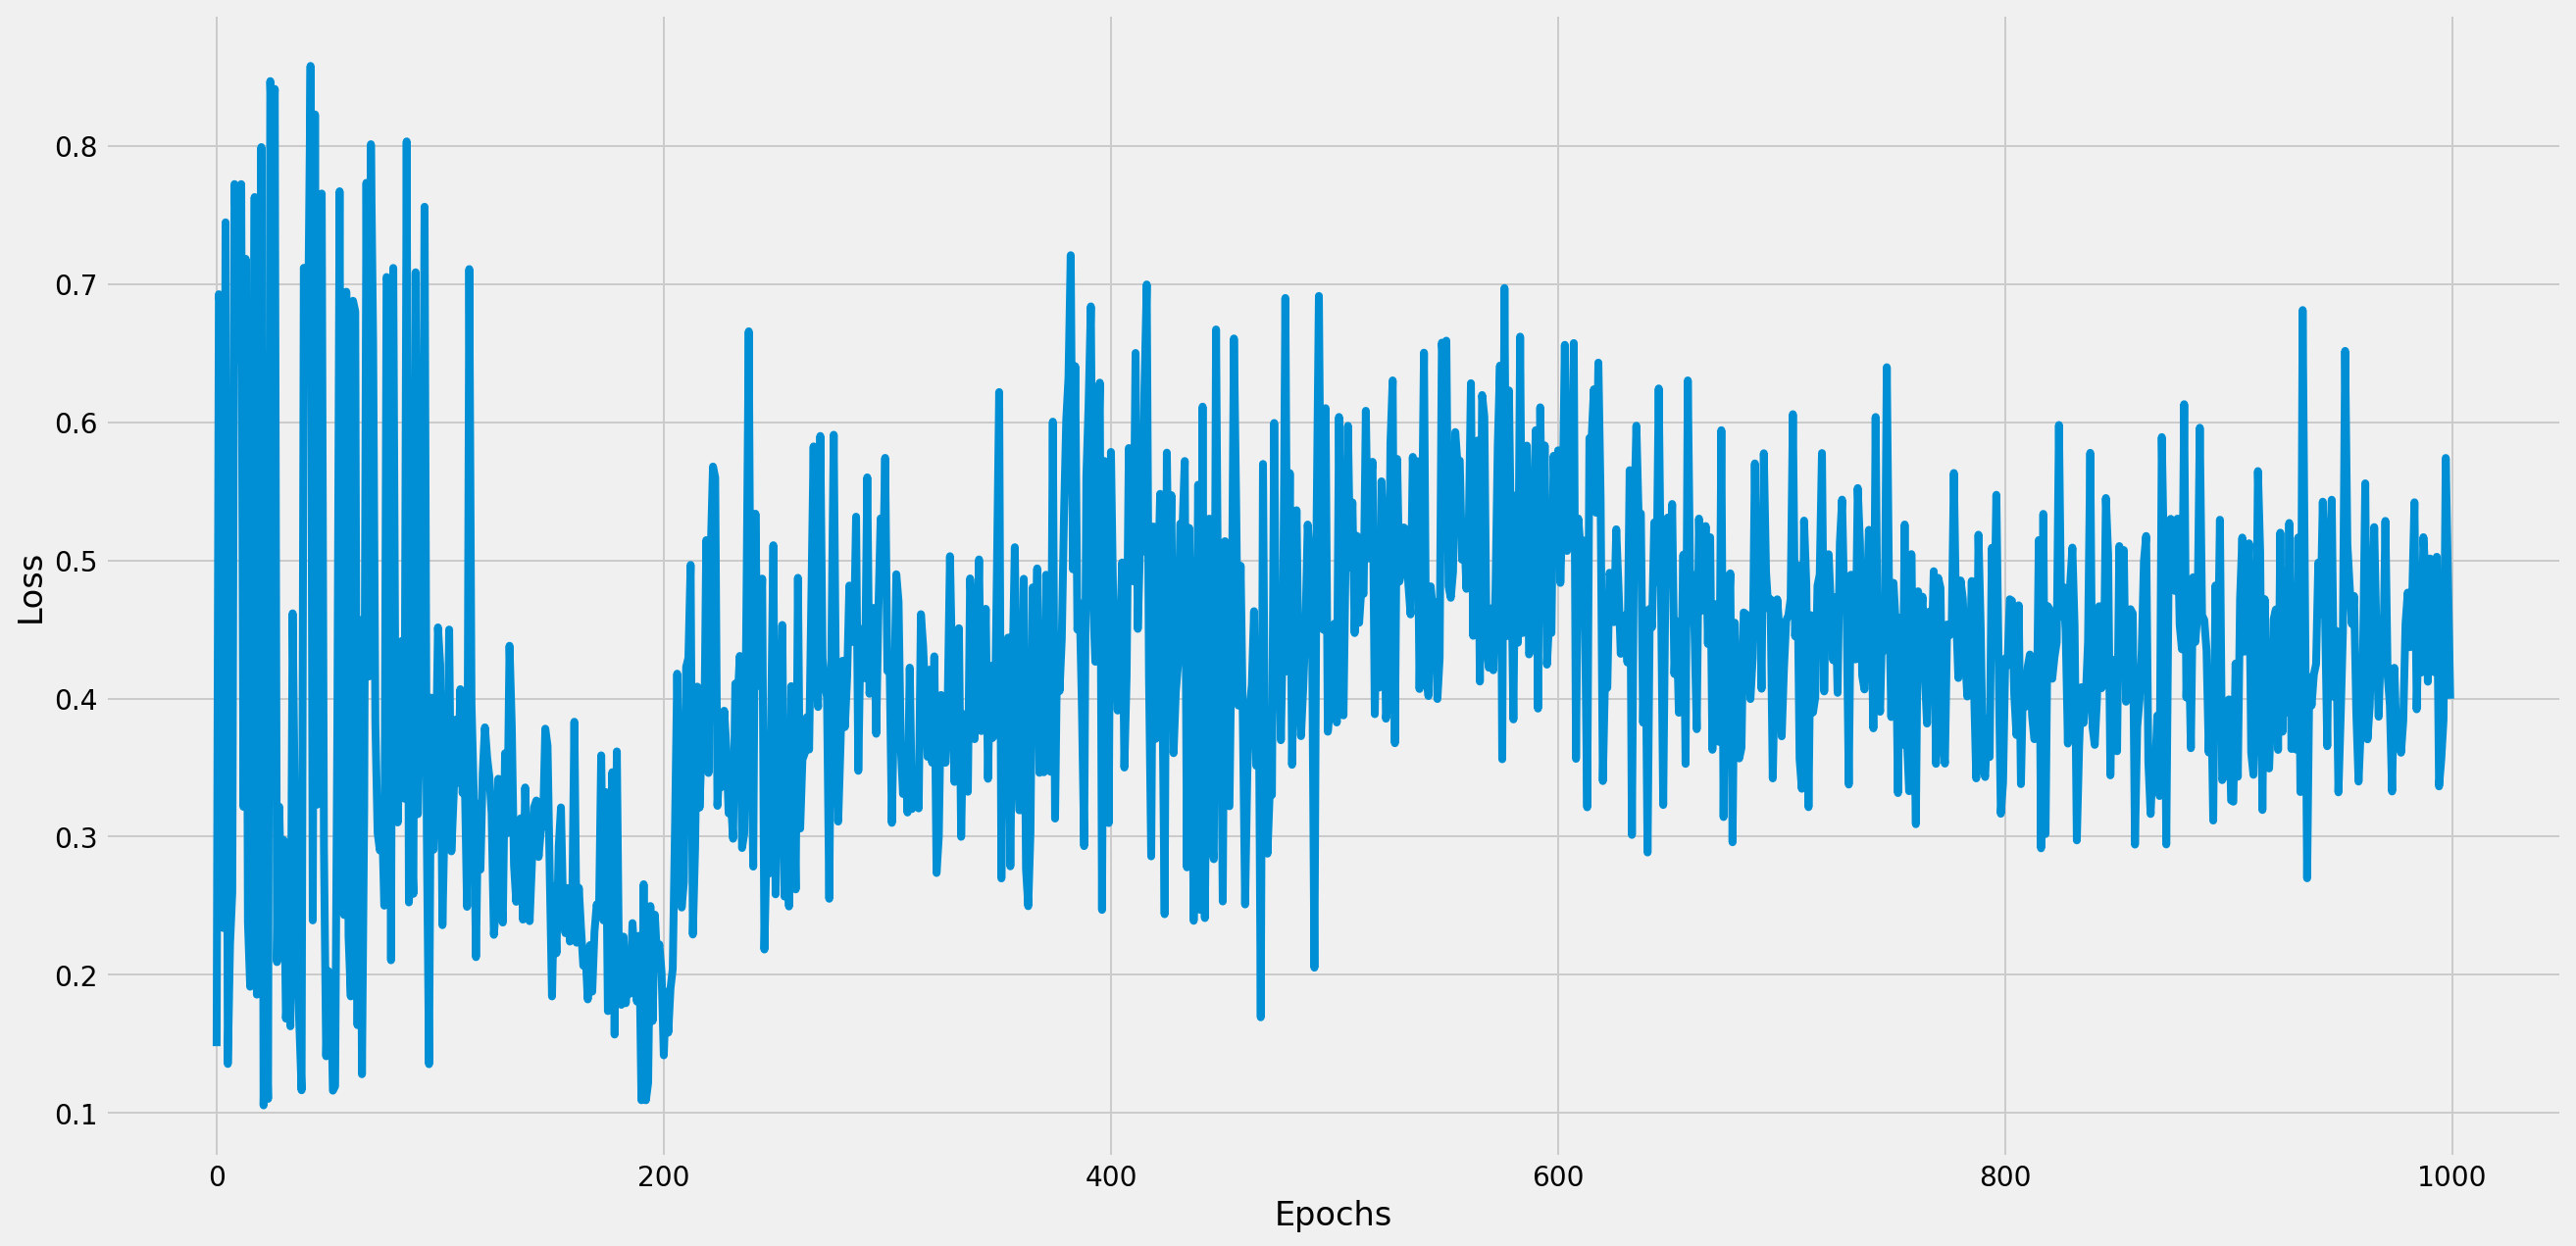

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20, 10))

plt.plot(d_logs_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


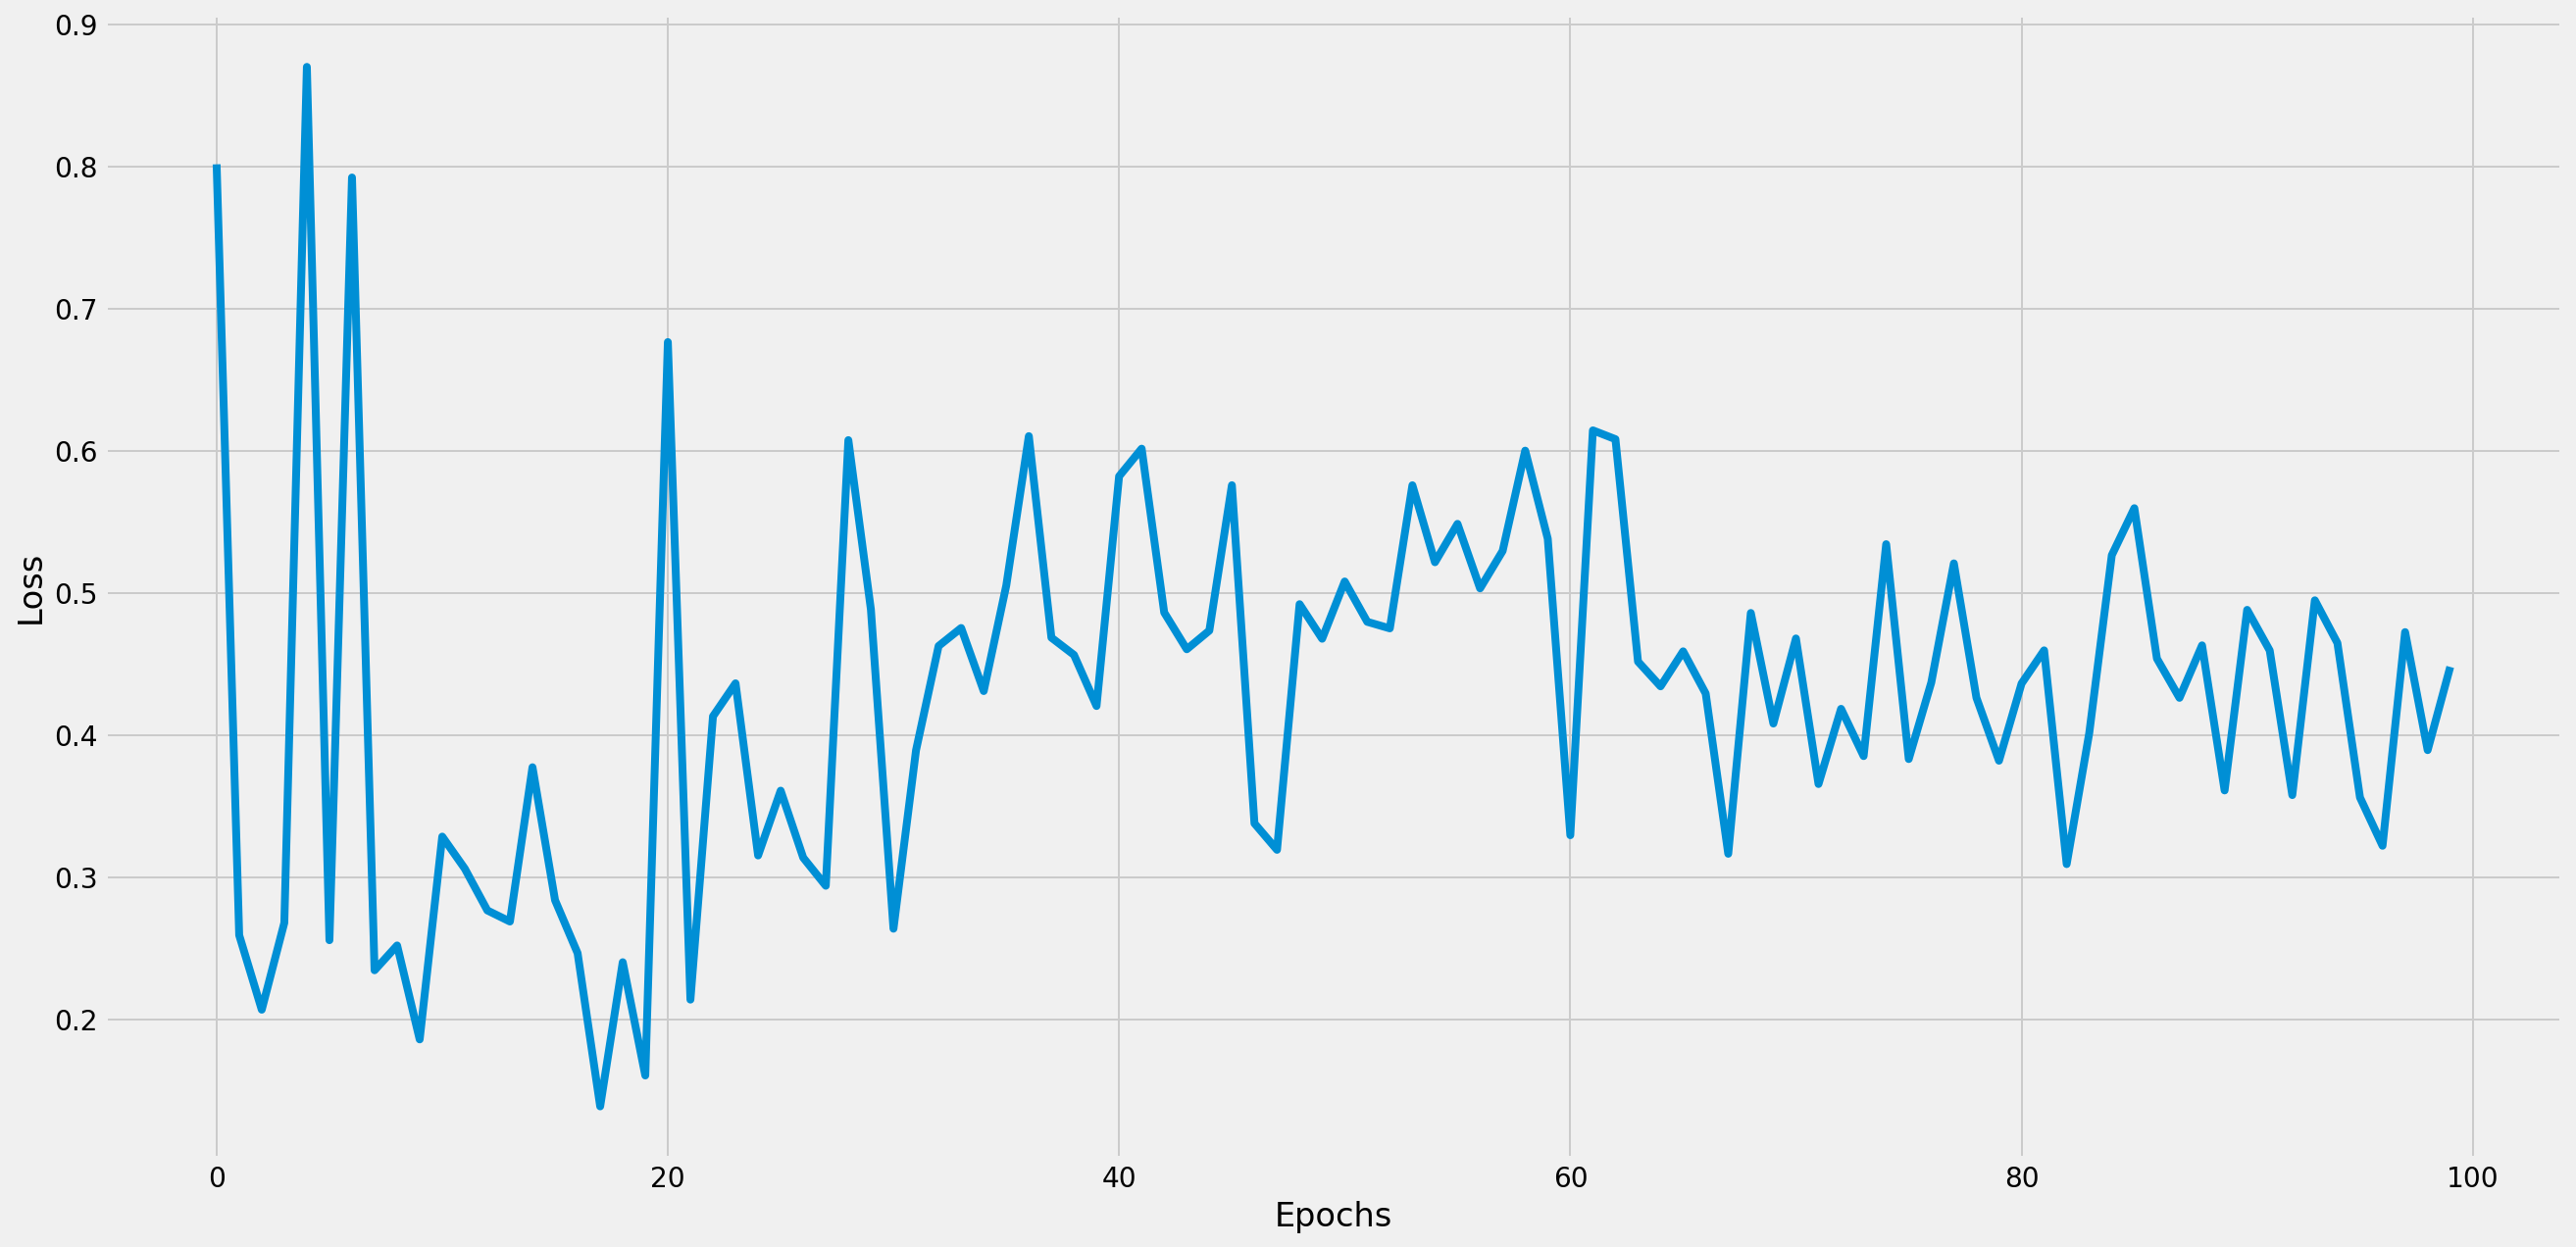

In [25]:
plt.figure(figsize=(20, 10))

plt.plot(g_logs_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


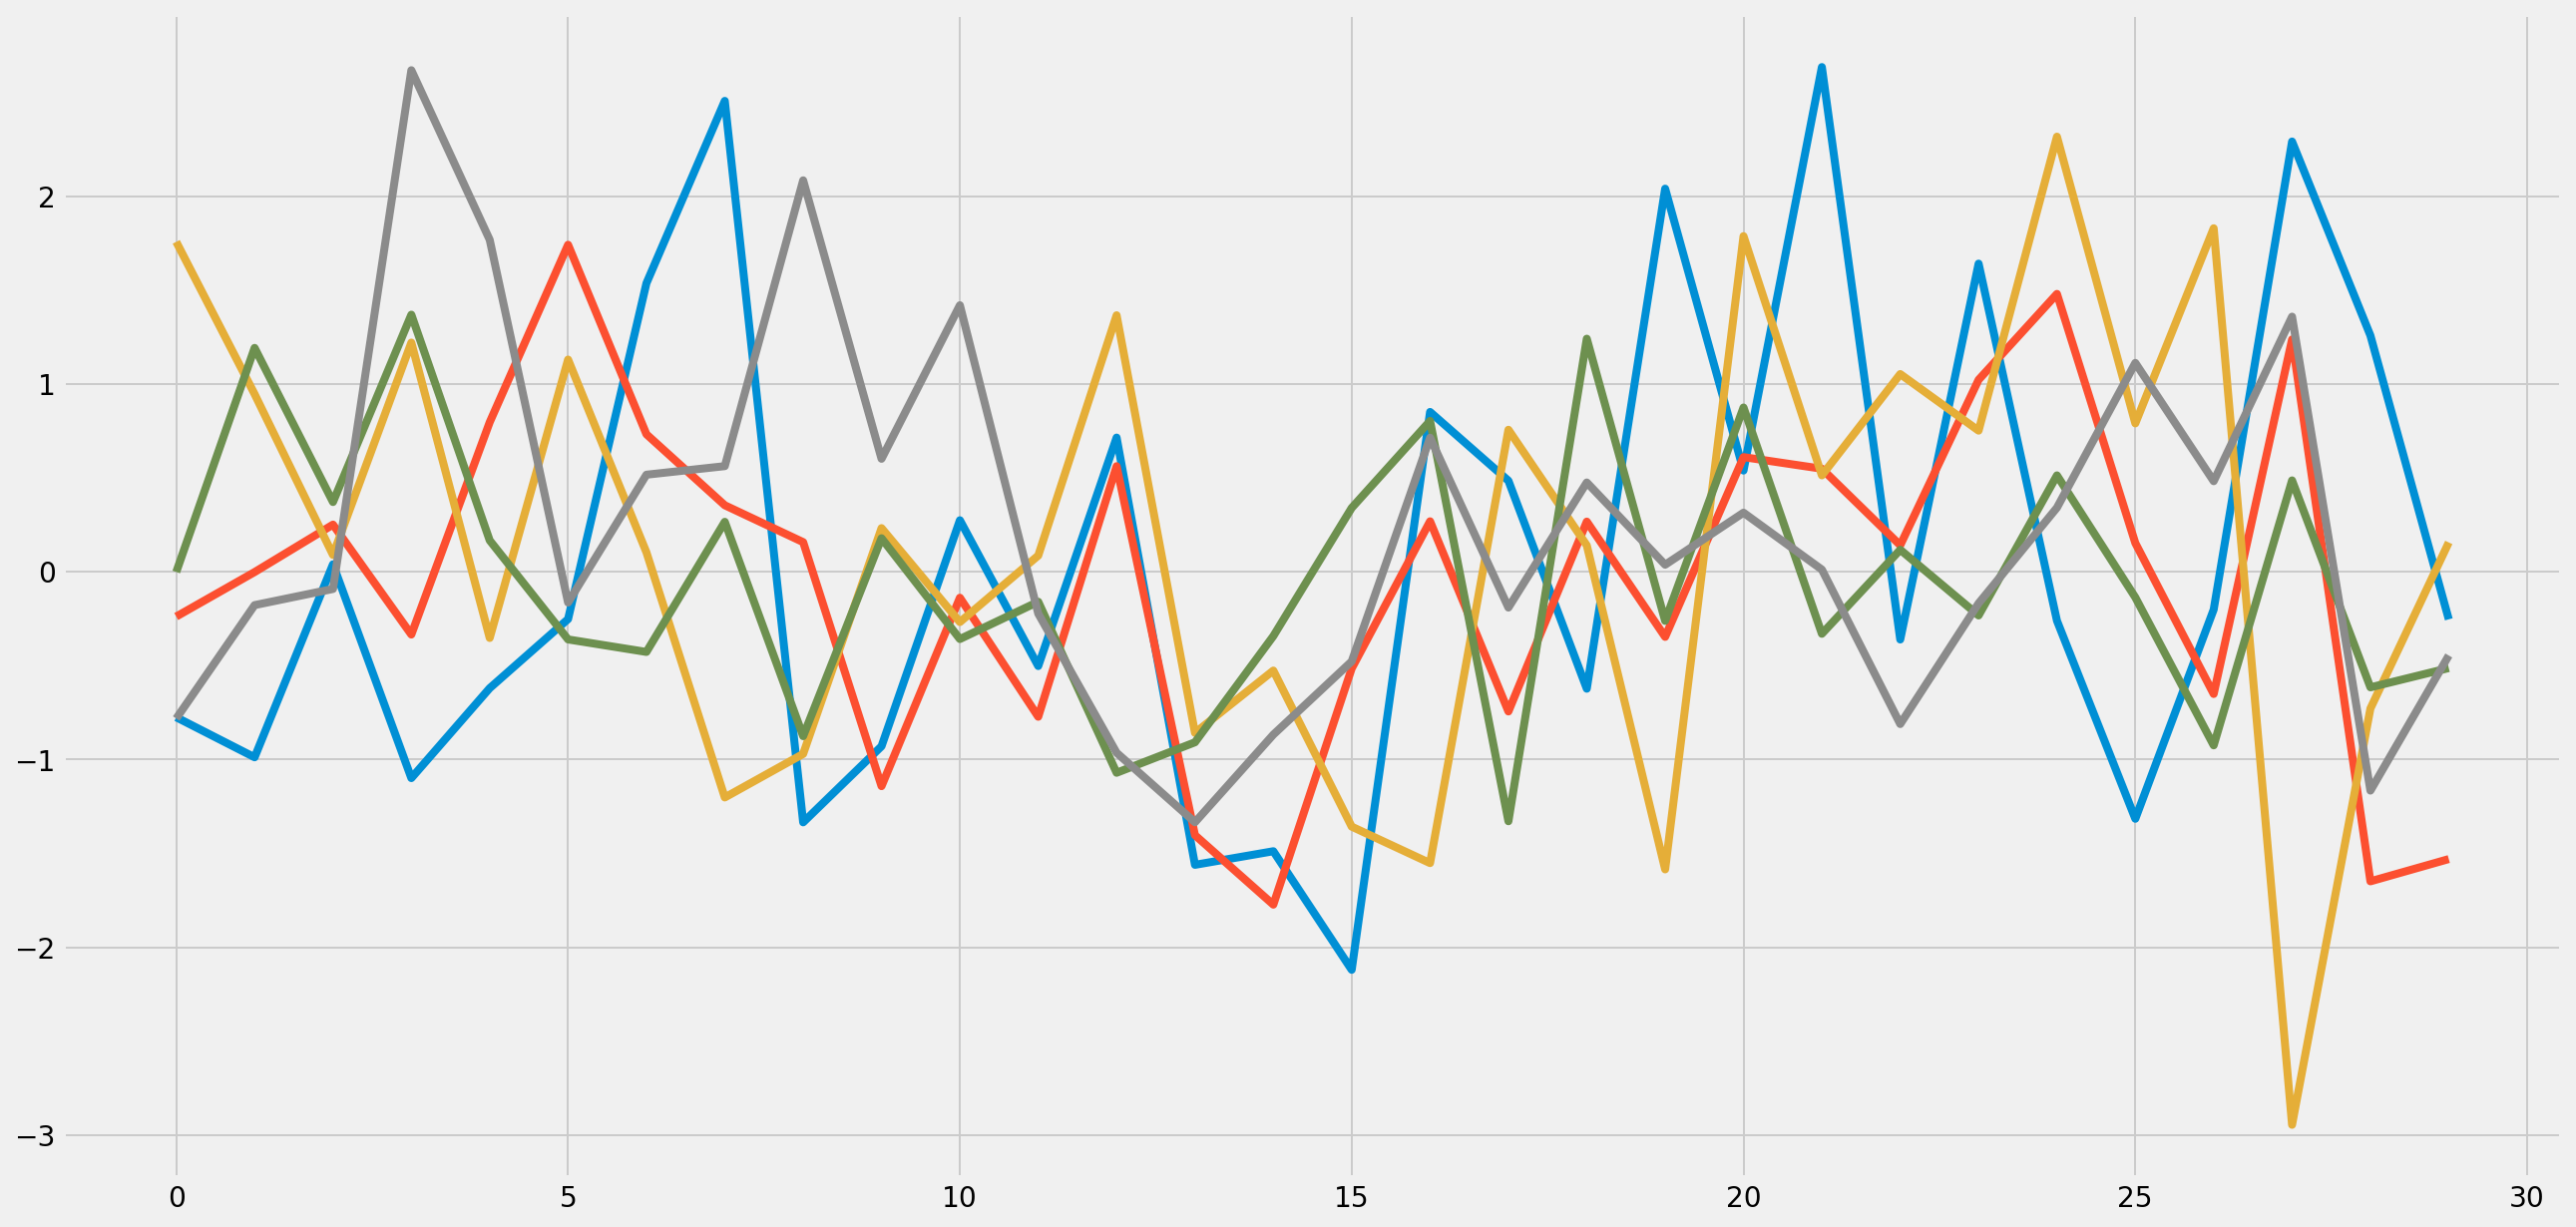

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20, 10))

plt.plot(true_arr[0])
plt.show()

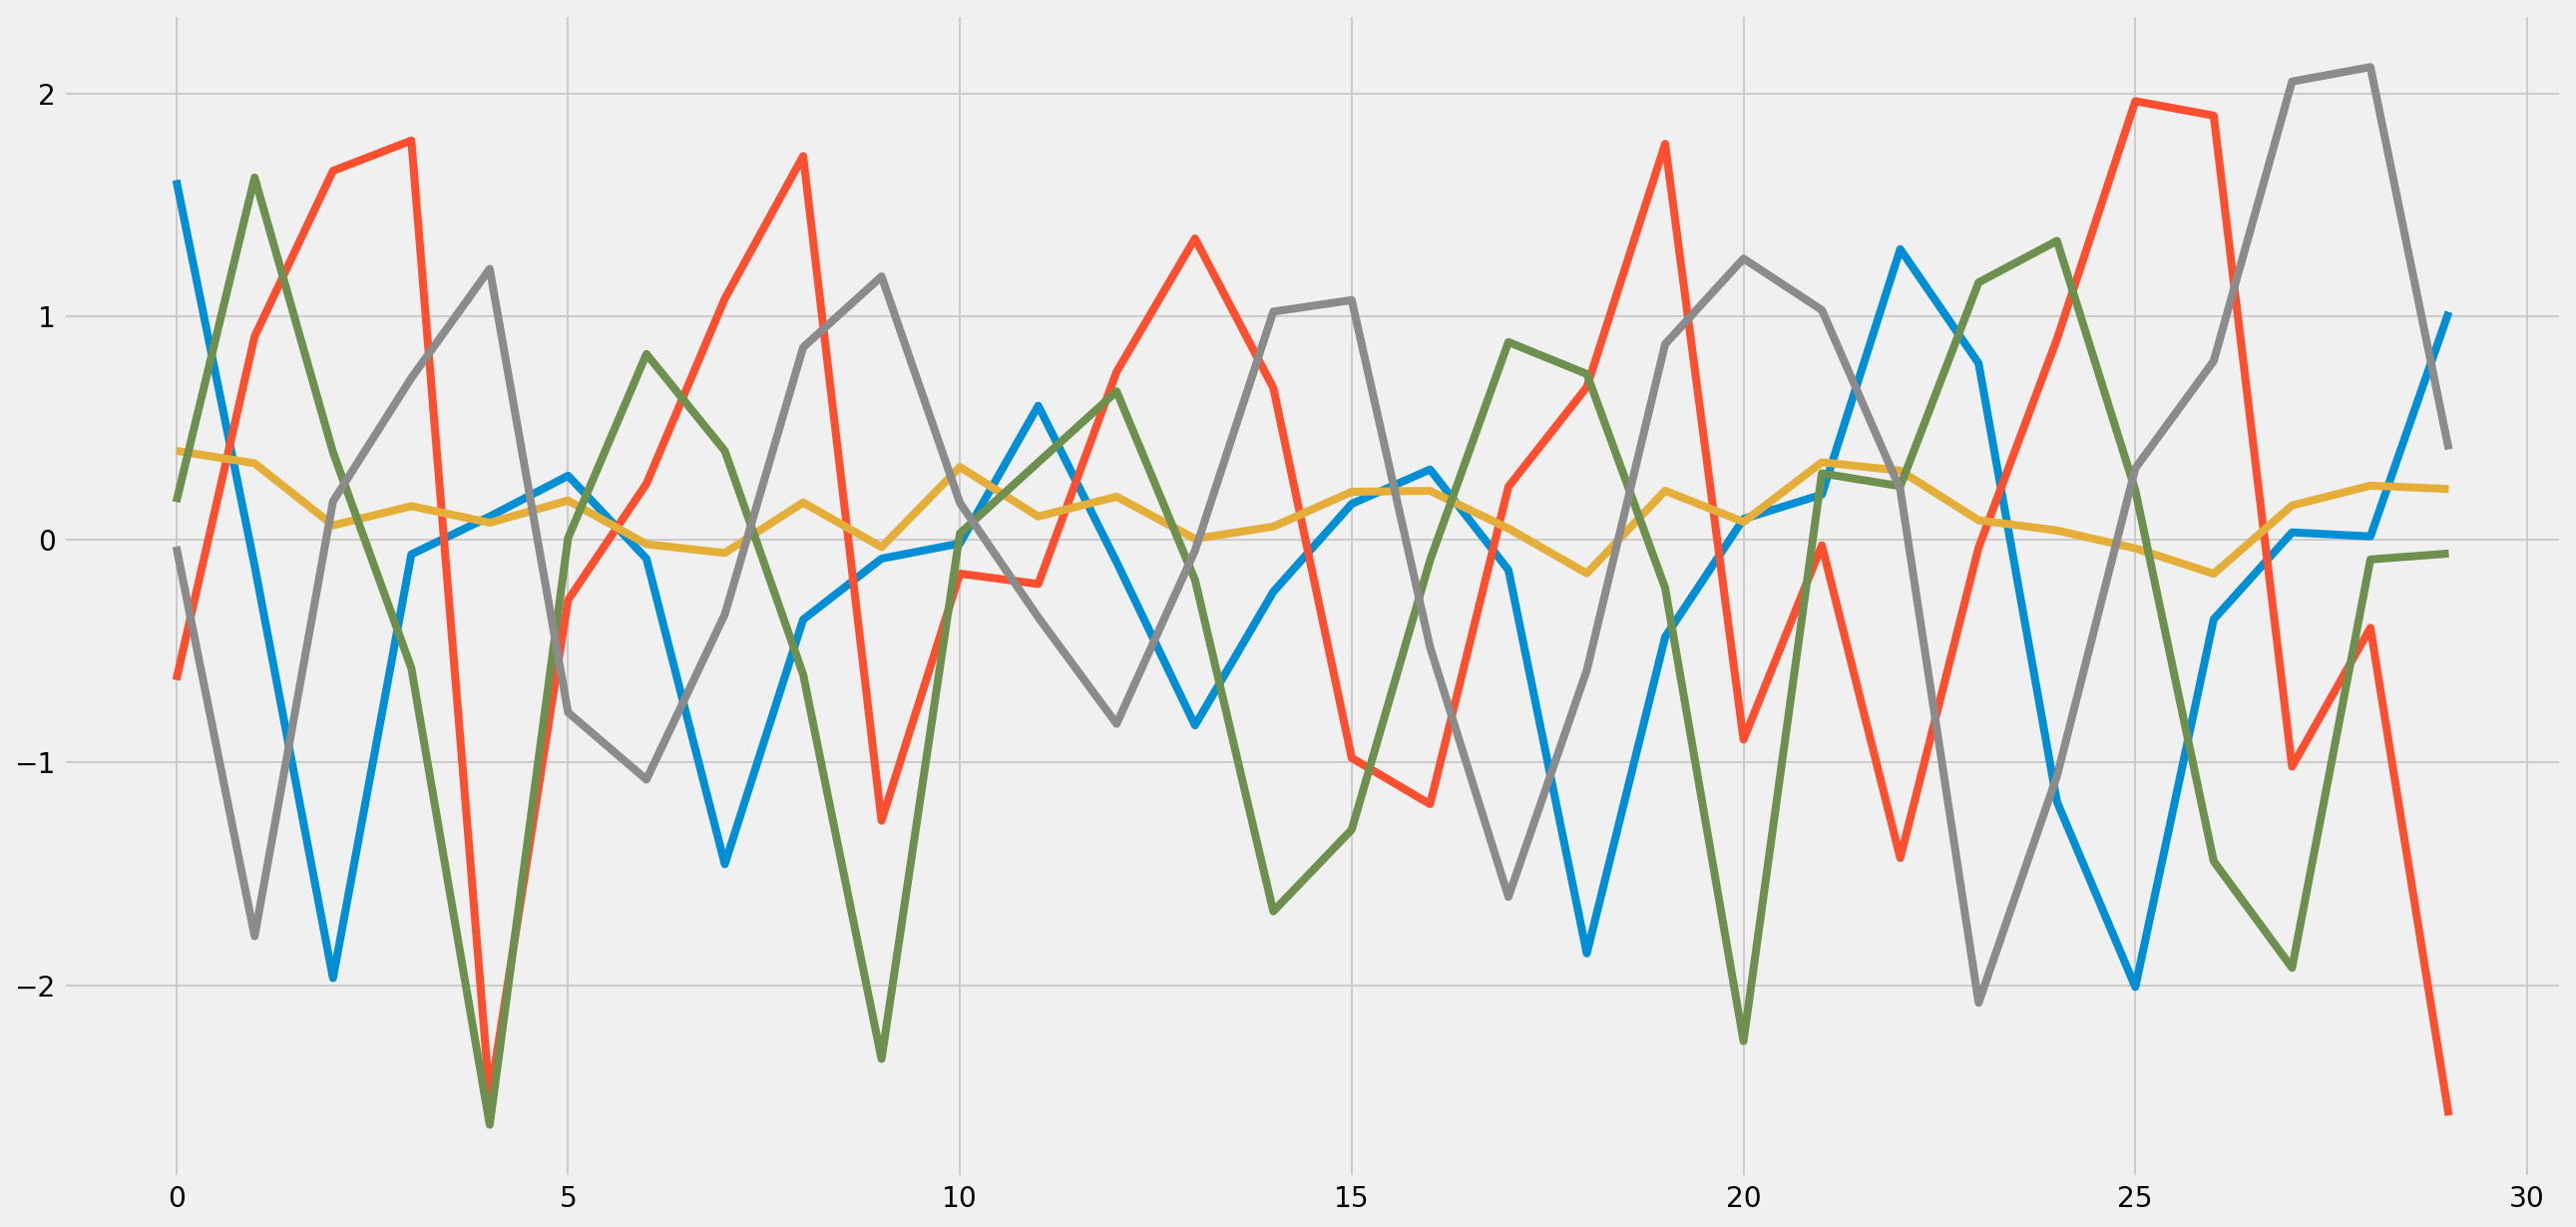

In [27]:
generated_arr = generative_model.draw()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20, 10))

plt.plot(generated_arr[0])
plt.show()

In [28]:
generative_model, discriminative_model = GAN.train(
    true_sampler,
    generative_model,
    discriminative_model,
    iter_n=100,
    k_step=10
)

----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4454479339988323
And update the `discriminator` by descending its stochastic gradient(means): -3.3132261294170897
Probability inferenced by the `discriminator` (mean): 0.48758502365246026
And update the `discriminator` by descending its stochastic gradient(means): -3.760945877376403
Probability inferenced by the `discriminator` (mean): 0.517024280662208
And update the `discriminator` by descending its stochastic gradient(means): -3.643732806918581
Probability inferenced by the `discriminator` (mean): 0.43501202570875525
And update the `discriminator` by descending its stochastic gradient(means): -3.53572646588064
Probability inferenced by the `discriminator` (mean): 0.5156598131663443
And update the `disc

Probability inferenced by the `discriminator` (mean): 0.32790242205060394
And update the `discriminator` by descending its stochastic gradient(means): -3.655565563155245
Probability inferenced by the `discriminator` (mean): 0.4959127893685987
And update the `discriminator` by descending its stochastic gradient(means): -3.6306176763219056
Probability inferenced by the `discriminator` (mean): 0.48937950076012593
And update the `discriminator` by descending its stochastic gradient(means): -3.3697379602931763
Probability inferenced by the `discriminator` (mean): 0.43015236968237425
And update the `discriminator` by descending its stochastic gradient(means): -3.3707119843511393
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.258399549177827
And update the `gene

Probability inferenced by the `discriminator` (mean): 0.3644388323936993
And update the `discriminator` by descending its stochastic gradient(means): -3.195643608846367
Probability inferenced by the `discriminator` (mean): 0.44913834925822327
And update the `discriminator` by descending its stochastic gradient(means): -3.437771648458243
Probability inferenced by the `discriminator` (mean): 0.31907622843773736
And update the `discriminator` by descending its stochastic gradient(means): -2.812379968673022
Probability inferenced by the `discriminator` (mean): 0.42106648986214734
And update the `discriminator` by descending its stochastic gradient(means): -3.0021572190277666
Probability inferenced by the `discriminator` (mean): 0.5490991805545049
And update the `discriminator` by descending its stochastic gradient(means): -4.5374486457744485
Probability inferenced by the `discriminator` (mean): 0.46104564637782086
And update the `discriminator` by descending its stochastic gradient(means):

And update the `discriminator` by descending its stochastic gradient(means): -3.3884614550266705
Probability inferenced by the `discriminator` (mean): 0.40181137132239375
And update the `discriminator` by descending its stochastic gradient(means): -3.0550241022679123
Probability inferenced by the `discriminator` (mean): 0.44841164232095954
And update the `discriminator` by descending its stochastic gradient(means): -3.129813224182945
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4088121503099303
And update the `generator` by descending its stochastic gradient(means): -7.595396771302928e-06
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
--------------------------------------

Probability inferenced by the `discriminator` (mean): 0.4041673589757654
And update the `discriminator` by descending its stochastic gradient(means): -3.098596185727449
Probability inferenced by the `discriminator` (mean): 0.3381596487145649
And update the `discriminator` by descending its stochastic gradient(means): -3.214226940975557
Probability inferenced by the `discriminator` (mean): 0.5367746225244517
And update the `discriminator` by descending its stochastic gradient(means): -4.212661655183512
Probability inferenced by the `discriminator` (mean): 0.4121549892265546
And update the `discriminator` by descending its stochastic gradient(means): -3.662908793052233
Probability inferenced by the `discriminator` (mean): 0.42690470986395335
And update the `discriminator` by descending its stochastic gradient(means): -3.3046390851083274
Probability inferenced by the `discriminator` (mean): 0.42933770947697775
And update the `discriminator` by descending its stochastic gradient(means): -3

And update the `discriminator` by descending its stochastic gradient(means): -3.620030728292484
Probability inferenced by the `discriminator` (mean): 0.45639106018999137
And update the `discriminator` by descending its stochastic gradient(means): -3.7561956489767616
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.3454869976911653
And update the `generator` by descending its stochastic gradient(means): -1.1816774083215867e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4408231217741445
And update the `discriminator` by 

Probability inferenced by the `discriminator` (mean): 0.541052438054767
And update the `discriminator` by descending its stochastic gradient(means): -3.786848011219432
Probability inferenced by the `discriminator` (mean): 0.45930613990924957
And update the `discriminator` by descending its stochastic gradient(means): -3.1071313159307725
Probability inferenced by the `discriminator` (mean): 0.4476075447740612
And update the `discriminator` by descending its stochastic gradient(means): -3.4334162914575375
Probability inferenced by the `discriminator` (mean): 0.5023972370243905
And update the `discriminator` by descending its stochastic gradient(means): -3.933804228211868
Probability inferenced by the `discriminator` (mean): 0.4842417366681147
And update the `discriminator` by descending its stochastic gradient(means): -3.8370395410592777
Probability inferenced by the `discriminator` (mean): 0.4818601970088757
And update the `discriminator` by descending its stochastic gradient(means): -3

And update the `discriminator` by descending its stochastic gradient(means): -3.445443003750028
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4562813080185416
And update the `generator` by descending its stochastic gradient(means): -2.2875228629365193e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.407820571843987
And update the `discriminator` by descending its stochastic gradient(means): -3.8600305848331216
Probability inferenced by the `discriminator` (mean): 0.3179509399775392
And update the `discriminator` by de

Probability inferenced by the `discriminator` (mean): 0.49352279287253165
And update the `discriminator` by descending its stochastic gradient(means): -3.809016842802533
Probability inferenced by the `discriminator` (mean): 0.47022082144029564
And update the `discriminator` by descending its stochastic gradient(means): -3.516774618997503
Probability inferenced by the `discriminator` (mean): 0.33877123880323556
And update the `discriminator` by descending its stochastic gradient(means): -2.8112918804586036
Probability inferenced by the `discriminator` (mean): 0.36819088323089955
And update the `discriminator` by descending its stochastic gradient(means): -3.1194016973903795
Probability inferenced by the `discriminator` (mean): 0.4262615691416022
And update the `discriminator` by descending its stochastic gradient(means): -3.8074974809641695
Probability inferenced by the `discriminator` (mean): 0.46650711830331104
And update the `discriminator` by descending its stochastic gradient(means

The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.3620979660372422
And update the `generator` by descending its stochastic gradient(means): -2.866699901118654e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.38846726008158194
And update the `discriminator` by descending its stochastic gradient(means): -3.2578622945607685
Probability inferenced by the `discriminator` (mean): 0.4227175775873997
And update the `discriminator` by descending its stochastic gradient(means): -3.665119986475111
Probability inferenced by the `discriminator` (mean): 0.22532048620333972
And update the `discriminator` by descending its stochastic gr

And update the `discriminator` by descending its stochastic gradient(means): -3.4539099869320595
Probability inferenced by the `discriminator` (mean): 0.39753961020634204
And update the `discriminator` by descending its stochastic gradient(means): -3.572051019781717
Probability inferenced by the `discriminator` (mean): 0.4933618177443117
And update the `discriminator` by descending its stochastic gradient(means): -3.6207744405168825
Probability inferenced by the `discriminator` (mean): 0.3661957630172195
And update the `discriminator` by descending its stochastic gradient(means): -2.9072962847664474
Probability inferenced by the `discriminator` (mean): 0.5769051077470535
And update the `discriminator` by descending its stochastic gradient(means): -3.9804081874269257
Probability inferenced by the `discriminator` (mean): 0.38401436808869527
And update the `discriminator` by descending its stochastic gradient(means): -3.7070502811800523
----------------------------------------------------

And update the `generator` by descending its stochastic gradient(means): -4.079853980886107e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4293702746814173
And update the `discriminator` by descending its stochastic gradient(means): -3.3499586565026873
Probability inferenced by the `discriminator` (mean): 0.4518697831053303
And update the `discriminator` by descending its stochastic gradient(means): -3.3513796018387643
Probability inferenced by the `discriminator` (mean): 0.6194131259224278
And update the `discriminator` by descending its stochastic gradient(means): -4.009047002824372
Probability inferenced by the `discriminator` (mean): 0.31540367112610423
And update the `discriminator` by descending its stochastic gradient(means): -3.00789061348

And update the `discriminator` by descending its stochastic gradient(means): -4.179562071653674
Probability inferenced by the `discriminator` (mean): 0.46320721206130466
And update the `discriminator` by descending its stochastic gradient(means): -3.7964965952316936
Probability inferenced by the `discriminator` (mean): 0.40386375582196854
And update the `discriminator` by descending its stochastic gradient(means): -3.215745294797556
Probability inferenced by the `discriminator` (mean): 0.3790567817182456
And update the `discriminator` by descending its stochastic gradient(means): -3.536365642760795
Probability inferenced by the `discriminator` (mean): 0.48477904867748967
And update the `discriminator` by descending its stochastic gradient(means): -4.0846193731969755
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
--------------------------------------------------------------------------------------------------

The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.49291819902810874
And update the `discriminator` by descending its stochastic gradient(means): -3.0882069862697543
Probability inferenced by the `discriminator` (mean): 0.4964170139487651
And update the `discriminator` by descending its stochastic gradient(means): -4.024288994039439
Probability inferenced by the `discriminator` (mean): 0.2935429740842709
And update the `discriminator` by descending its stochastic gradient(means): -3.2128155770412485
Probability inferenced by the `discriminator` (mean): 0.4200619357255707
And update the `discriminator` by descending its stochastic gradient(means): -2.950355592102016
Probability inferenced by the `discriminator` (mean): 0.40777665315133926
And update the `discriminator` by descending its stochastic gradient(means): -3.5506134510226532
Probability inference

And update the `discriminator` by descending its stochastic gradient(means): -3.0581087630399058
Probability inferenced by the `discriminator` (mean): 0.5086812361919475
And update the `discriminator` by descending its stochastic gradient(means): -3.8339220565395054
Probability inferenced by the `discriminator` (mean): 0.4626187621571495
And update the `discriminator` by descending its stochastic gradient(means): -3.502153880808146
Probability inferenced by the `discriminator` (mean): 0.42546019500878723
And update the `discriminator` by descending its stochastic gradient(means): -3.522876563997054
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.35151255231095996
And update the `generator` by descending its stochastic gradient(means): -4.635213511118604e-0

Probability inferenced by the `discriminator` (mean): 0.5461059710628406
And update the `discriminator` by descending its stochastic gradient(means): -3.853195861721025
Probability inferenced by the `discriminator` (mean): 0.436473734952869
And update the `discriminator` by descending its stochastic gradient(means): -3.156828881625392
Probability inferenced by the `discriminator` (mean): 0.3213918641917557
And update the `discriminator` by descending its stochastic gradient(means): -2.7747000003204496
Probability inferenced by the `discriminator` (mean): 0.534288075877601
And update the `discriminator` by descending its stochastic gradient(means): -3.8219290494772764
Probability inferenced by the `discriminator` (mean): 0.612676180535761
And update the `discriminator` by descending its stochastic gradient(means): -3.7751615158486516
Probability inferenced by the `discriminator` (mean): 0.5103239098694866
And update the `discriminator` by descending its stochastic gradient(means): -3.87

And update the `discriminator` by descending its stochastic gradient(means): -3.787965783532833
Probability inferenced by the `discriminator` (mean): 0.44152367996010833
And update the `discriminator` by descending its stochastic gradient(means): -3.0931401048084304
Probability inferenced by the `discriminator` (mean): 0.3710511759781097
And update the `discriminator` by descending its stochastic gradient(means): -3.045161317510643
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4051646171382542
And update the `generator` by descending its stochastic gradient(means): -6.894813929076348e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------

Probability inferenced by the `discriminator` (mean): 0.4690270579110387
And update the `discriminator` by descending its stochastic gradient(means): -3.0446723419753745
Probability inferenced by the `discriminator` (mean): 0.4247109780611254
And update the `discriminator` by descending its stochastic gradient(means): -4.374633372003922
Probability inferenced by the `discriminator` (mean): 0.4954513153962153
And update the `discriminator` by descending its stochastic gradient(means): -3.904578055013212
Probability inferenced by the `discriminator` (mean): 0.47754287107666527
And update the `discriminator` by descending its stochastic gradient(means): -3.1776204538823727
Probability inferenced by the `discriminator` (mean): 0.4330377088139522
And update the `discriminator` by descending its stochastic gradient(means): -3.5520758661307497
Probability inferenced by the `discriminator` (mean): 0.5930719088724415
And update the `discriminator` by descending its stochastic gradient(means): -

And update the `discriminator` by descending its stochastic gradient(means): -2.8537380635389544
Probability inferenced by the `discriminator` (mean): 0.5739025941667589
And update the `discriminator` by descending its stochastic gradient(means): -3.6951160270035075
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4880638338215387
And update the `generator` by descending its stochastic gradient(means): -9.407202905610038e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.2902173811224564
And update the `discriminator` by d

Probability inferenced by the `discriminator` (mean): 0.4873220816317925
And update the `discriminator` by descending its stochastic gradient(means): -3.3267926946652784
Probability inferenced by the `discriminator` (mean): 0.33947761889641087
And update the `discriminator` by descending its stochastic gradient(means): -3.512585408899801
Probability inferenced by the `discriminator` (mean): 0.3909029109537204
And update the `discriminator` by descending its stochastic gradient(means): -3.3416330418057334
Probability inferenced by the `discriminator` (mean): 0.645895035758834
And update the `discriminator` by descending its stochastic gradient(means): -4.0147518635844515
Probability inferenced by the `discriminator` (mean): 0.39506982819433084
And update the `discriminator` by descending its stochastic gradient(means): -3.016271591545089
Probability inferenced by the `discriminator` (mean): 0.4009596248444776
And update the `discriminator` by descending its stochastic gradient(means): -

And update the `discriminator` by descending its stochastic gradient(means): -3.587215381791226
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.4572905276599924
And update the `generator` by descending its stochastic gradient(means): -9.528070487832834e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.45374364047256466
And update the `discriminator` by descending its stochastic gradient(means): -3.544429038530835
Probability inferenced by the `discriminator` (mean): 0.5411742232709322
And update the `discriminator` by de

Probability inferenced by the `discriminator` (mean): 0.4795989617742931
And update the `discriminator` by descending its stochastic gradient(means): -3.12947001692306
Probability inferenced by the `discriminator` (mean): 0.31521190008390015
And update the `discriminator` by descending its stochastic gradient(means): -2.9576466380431663
Probability inferenced by the `discriminator` (mean): 0.45373062317640367
And update the `discriminator` by descending its stochastic gradient(means): -3.2032243847589266
Probability inferenced by the `discriminator` (mean): 0.5128791836966005
And update the `discriminator` by descending its stochastic gradient(means): -3.721247648916215
Probability inferenced by the `discriminator` (mean): 0.39458389976270425
And update the `discriminator` by descending its stochastic gradient(means): -3.3292035527158688
Probability inferenced by the `discriminator` (mean): 0.4867765898103718
And update the `discriminator` by descending its stochastic gradient(means): 

The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.39241373695560633
And update the `generator` by descending its stochastic gradient(means): -8.629894550646658e-05
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.5463655123902468
And update the `discriminator` by descending its stochastic gradient(means): -3.9095055776240493
Probability inferenced by the `discriminator` (mean): 0.5415880341724653
And update the `discriminator` by descending its stochastic gradient(means): -4.072365956711851
Probability inferenced by the `discriminator` (mean): 0.5038616504733766
And update the `discriminator` by descending its stochastic gra

And update the `discriminator` by descending its stochastic gradient(means): -3.5847929068222038
Probability inferenced by the `discriminator` (mean): 0.46342731620692296
And update the `discriminator` by descending its stochastic gradient(means): -3.4791676636068116
Probability inferenced by the `discriminator` (mean): 0.42825821436142375
And update the `discriminator` by descending its stochastic gradient(means): -3.5803931797221855
Probability inferenced by the `discriminator` (mean): 0.5059170351708431
And update the `discriminator` by descending its stochastic gradient(means): -3.604315466463602
Probability inferenced by the `discriminator` (mean): 0.437708526287206
And update the `discriminator` by descending its stochastic gradient(means): -3.3776707334376965
Probability inferenced by the `discriminator` (mean): 0.5243067599907686
And update the `discriminator` by descending its stochastic gradient(means): -3.577876161152031
------------------------------------------------------

And update the `generator` by descending its stochastic gradient(means): -0.00015793695450856947
----------------------------------------------------------------------------------------------------
The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.46750081767214857
And update the `discriminator` by descending its stochastic gradient(means): -3.5801263222601873
Probability inferenced by the `discriminator` (mean): 0.5466478252507507
And update the `discriminator` by descending its stochastic gradient(means): -3.2426824346556673
Probability inferenced by the `discriminator` (mean): 0.6947344955603485
And update the `discriminator` by descending its stochastic gradient(means): -3.6201625085564983
Probability inferenced by the `discriminator` (mean): 0.6890843491768643
And update the `discriminator` by descending its stochastic gradient(means): -4.824840691

And update the `discriminator` by descending its stochastic gradient(means): -3.74652529679154
Probability inferenced by the `discriminator` (mean): 0.5328083003114235
And update the `discriminator` by descending its stochastic gradient(means): -3.4499264878430767
Probability inferenced by the `discriminator` (mean): 0.44328930583885756
And update the `discriminator` by descending its stochastic gradient(means): -3.0294472370882657
Probability inferenced by the `discriminator` (mean): 0.6161289172188953
And update the `discriminator` by descending its stochastic gradient(means): -3.9311765790935964
Probability inferenced by the `discriminator` (mean): 0.4250524730218463
And update the `discriminator` by descending its stochastic gradient(means): -3.589253879558376
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------

The `discriminator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.5225415064750324
And update the `discriminator` by descending its stochastic gradient(means): -3.8732865964365724
Probability inferenced by the `discriminator` (mean): 0.41260357004000364
And update the `discriminator` by descending its stochastic gradient(means): -2.812296487837483
Probability inferenced by the `discriminator` (mean): 0.495220886156568
And update the `discriminator` by descending its stochastic gradient(means): -3.297889734688154
Probability inferenced by the `discriminator` (mean): 0.5606259648083729
And update the `discriminator` by descending its stochastic gradient(means): -3.682785137700003
Probability inferenced by the `discriminator` (mean): 0.4179899275083221
And update the `discriminator` by descending its stochastic gradient(means): -3.7872437737133735
Probability inferenced b

And update the `discriminator` by descending its stochastic gradient(means): -4.026705667389881
Probability inferenced by the `discriminator` (mean): 0.5387831383244578
And update the `discriminator` by descending its stochastic gradient(means): -3.3804046037019178
Probability inferenced by the `discriminator` (mean): 0.4041829946766235
And update the `discriminator` by descending its stochastic gradient(means): -3.295712286186317
Probability inferenced by the `discriminator` (mean): 0.44522870846470636
And update the `discriminator` by descending its stochastic gradient(means): -2.92146939332632
----------------------------------------------------------------------------------------------------
The `generator`'s turn.
----------------------------------------------------------------------------------------------------
Probability inferenced by the `discriminator` (mean): 0.5561863887779437
And update the `generator` by descending its stochastic gradient(means): -0.00016007901709242474


Probability inferenced by the `discriminator` (mean): 0.281471571948792
And update the `discriminator` by descending its stochastic gradient(means): -3.122584771519294
Probability inferenced by the `discriminator` (mean): 0.497699063771849
And update the `discriminator` by descending its stochastic gradient(means): -3.3373568750908094
Probability inferenced by the `discriminator` (mean): 0.44784034894028146
And update the `discriminator` by descending its stochastic gradient(means): -3.021233489962109
Probability inferenced by the `discriminator` (mean): 0.5820496358413535
And update the `discriminator` by descending its stochastic gradient(means): -3.809653211533033
Probability inferenced by the `discriminator` (mean): 0.3587993008961451
And update the `discriminator` by descending its stochastic gradient(means): -3.503090347023705
Probability inferenced by the `discriminator` (mean): 0.6624396304747541
And update the `discriminator` by descending its stochastic gradient(means): -4.22

In [29]:
d_logs_list2, g_logs_list2 = GAN.extract_logs_tuple()

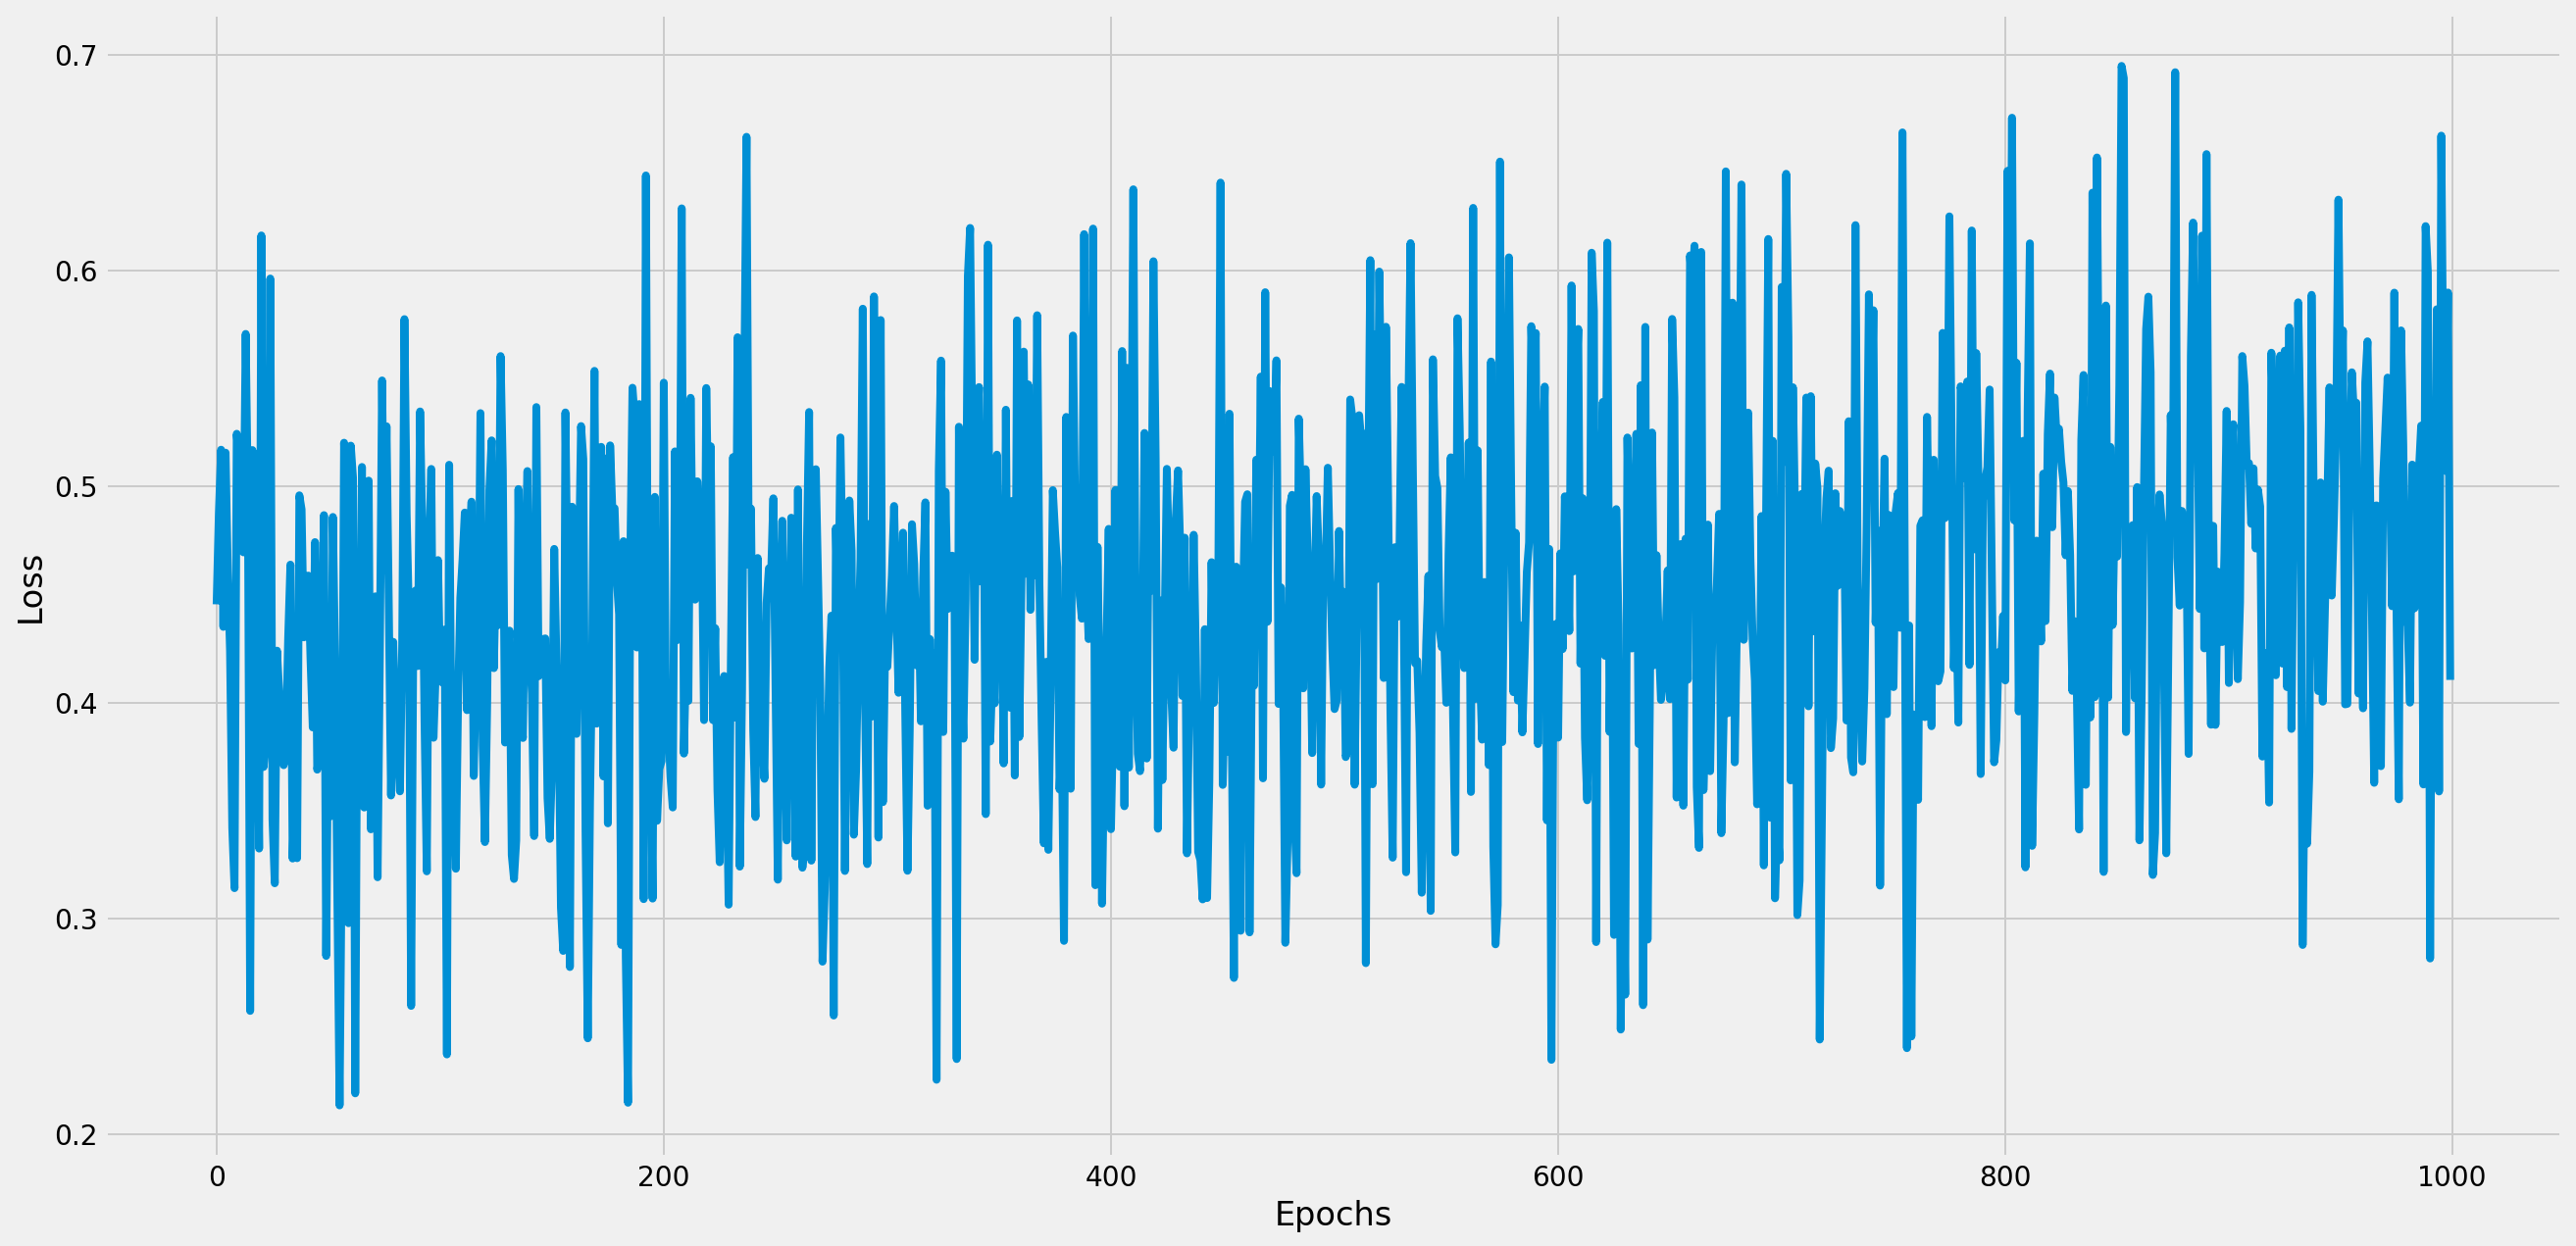

In [30]:
plt.figure(figsize=(20, 10))

plt.plot(d_logs_list2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

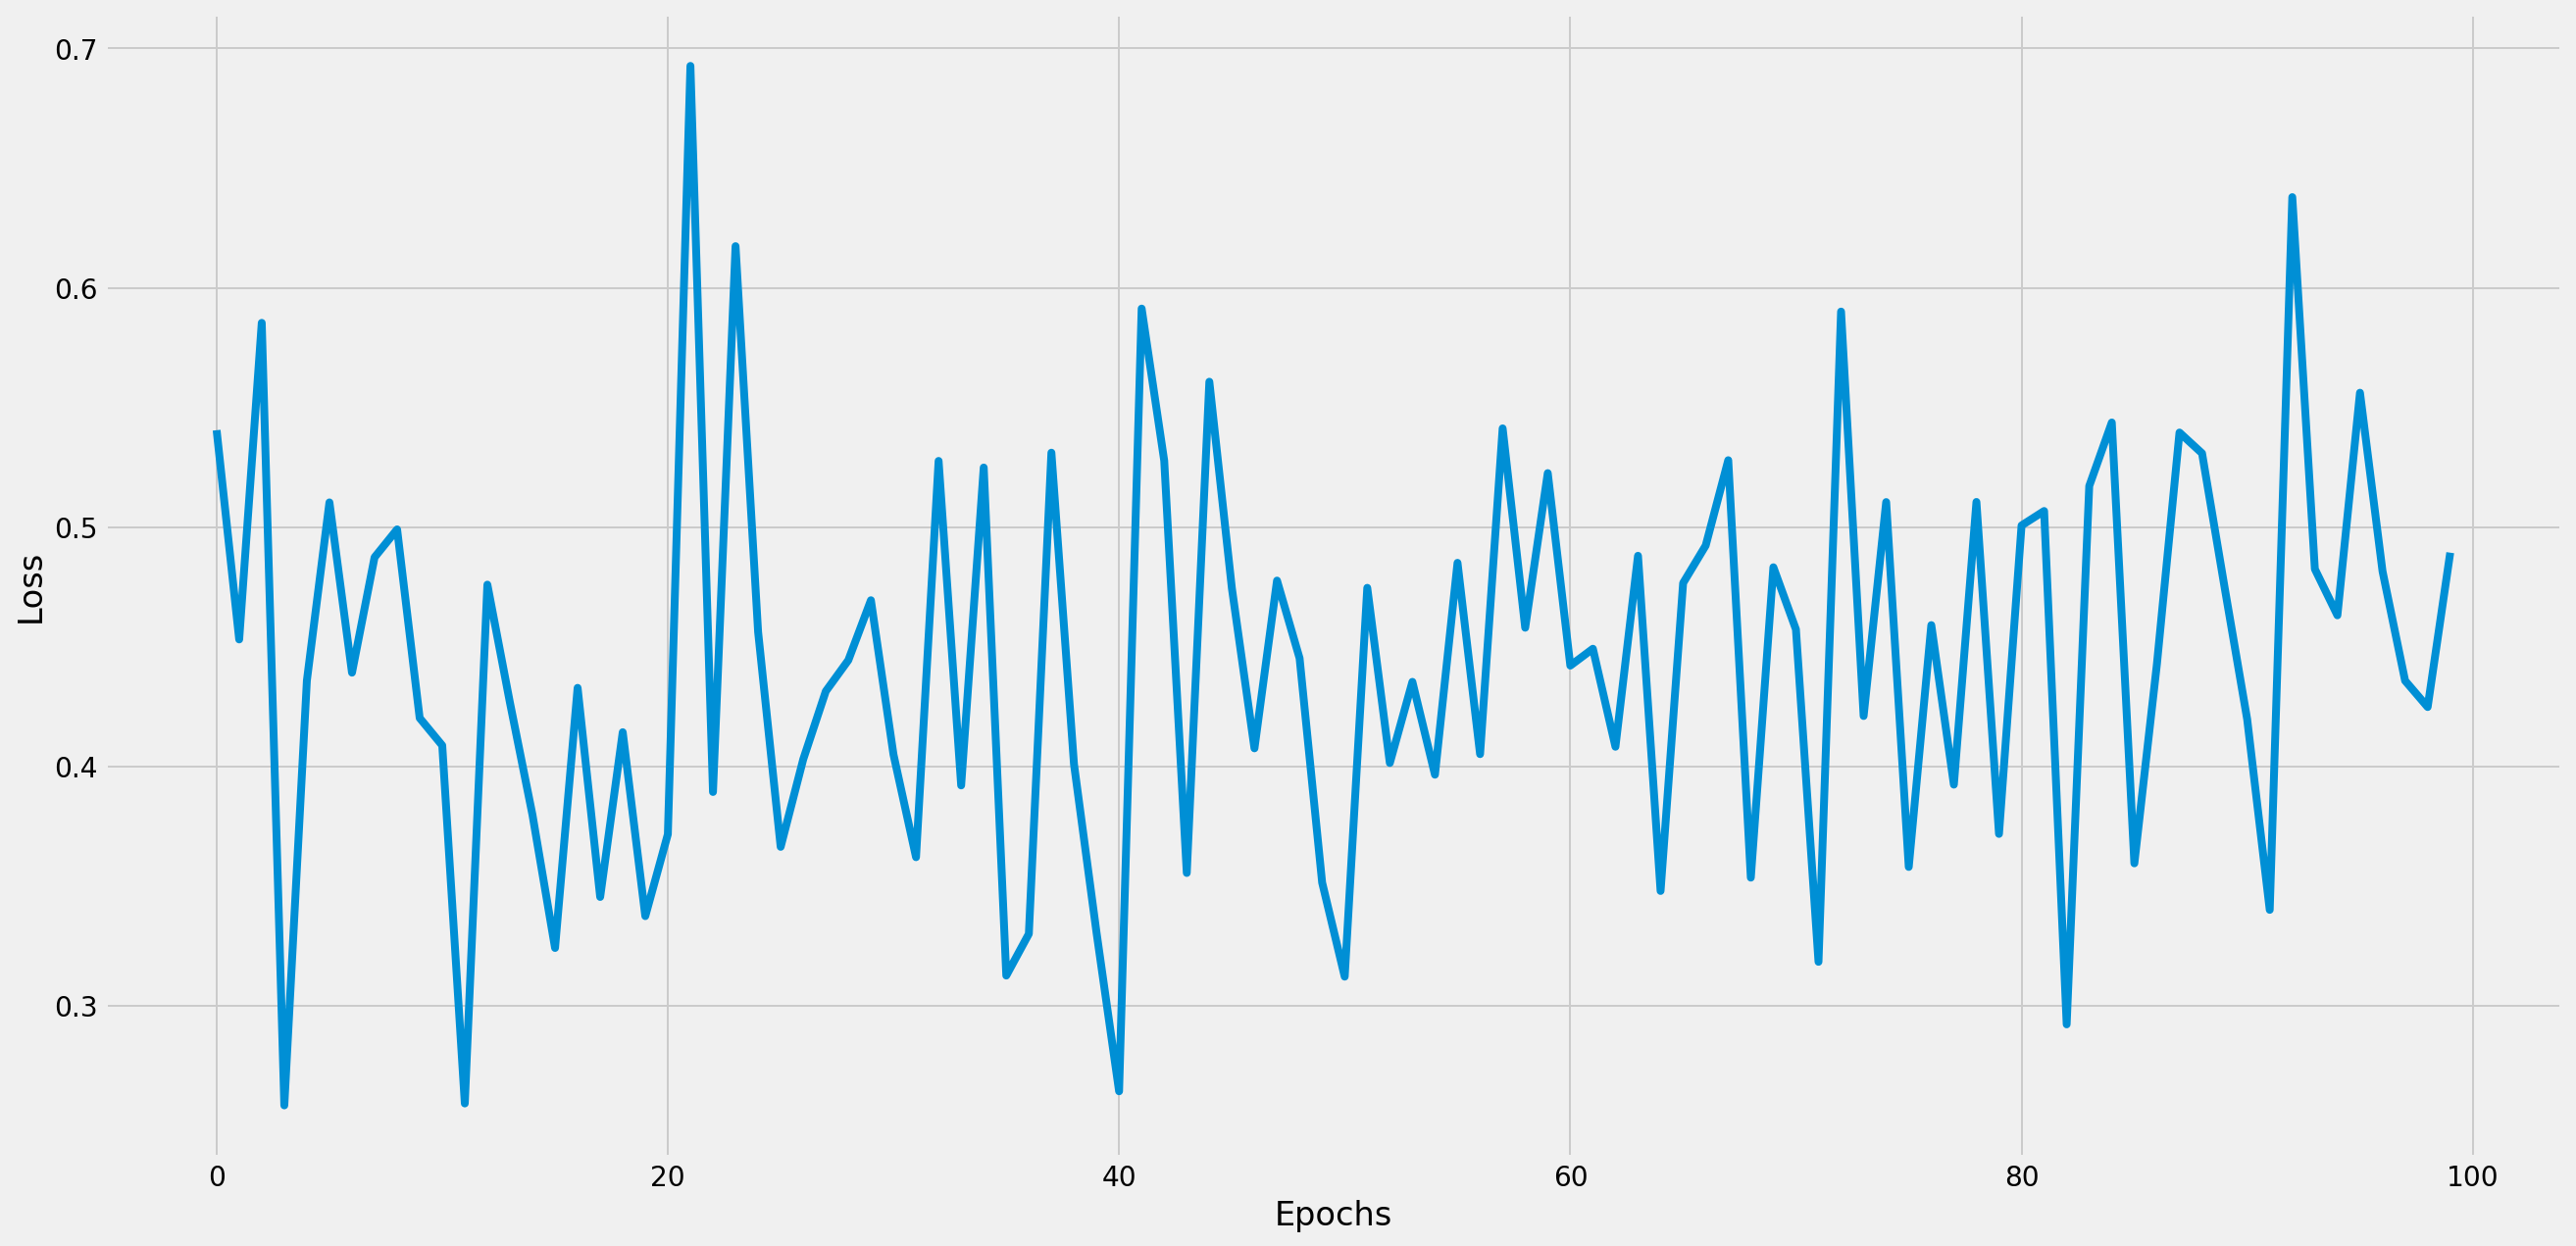

In [31]:
plt.figure(figsize=(20, 10))

plt.plot(g_logs_list2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [32]:
d_logs_list3 = d_logs_list
d_logs_list3.extend(d_logs_list2)

g_logs_list3 = g_logs_list
g_logs_list3.extend(g_logs_list2)

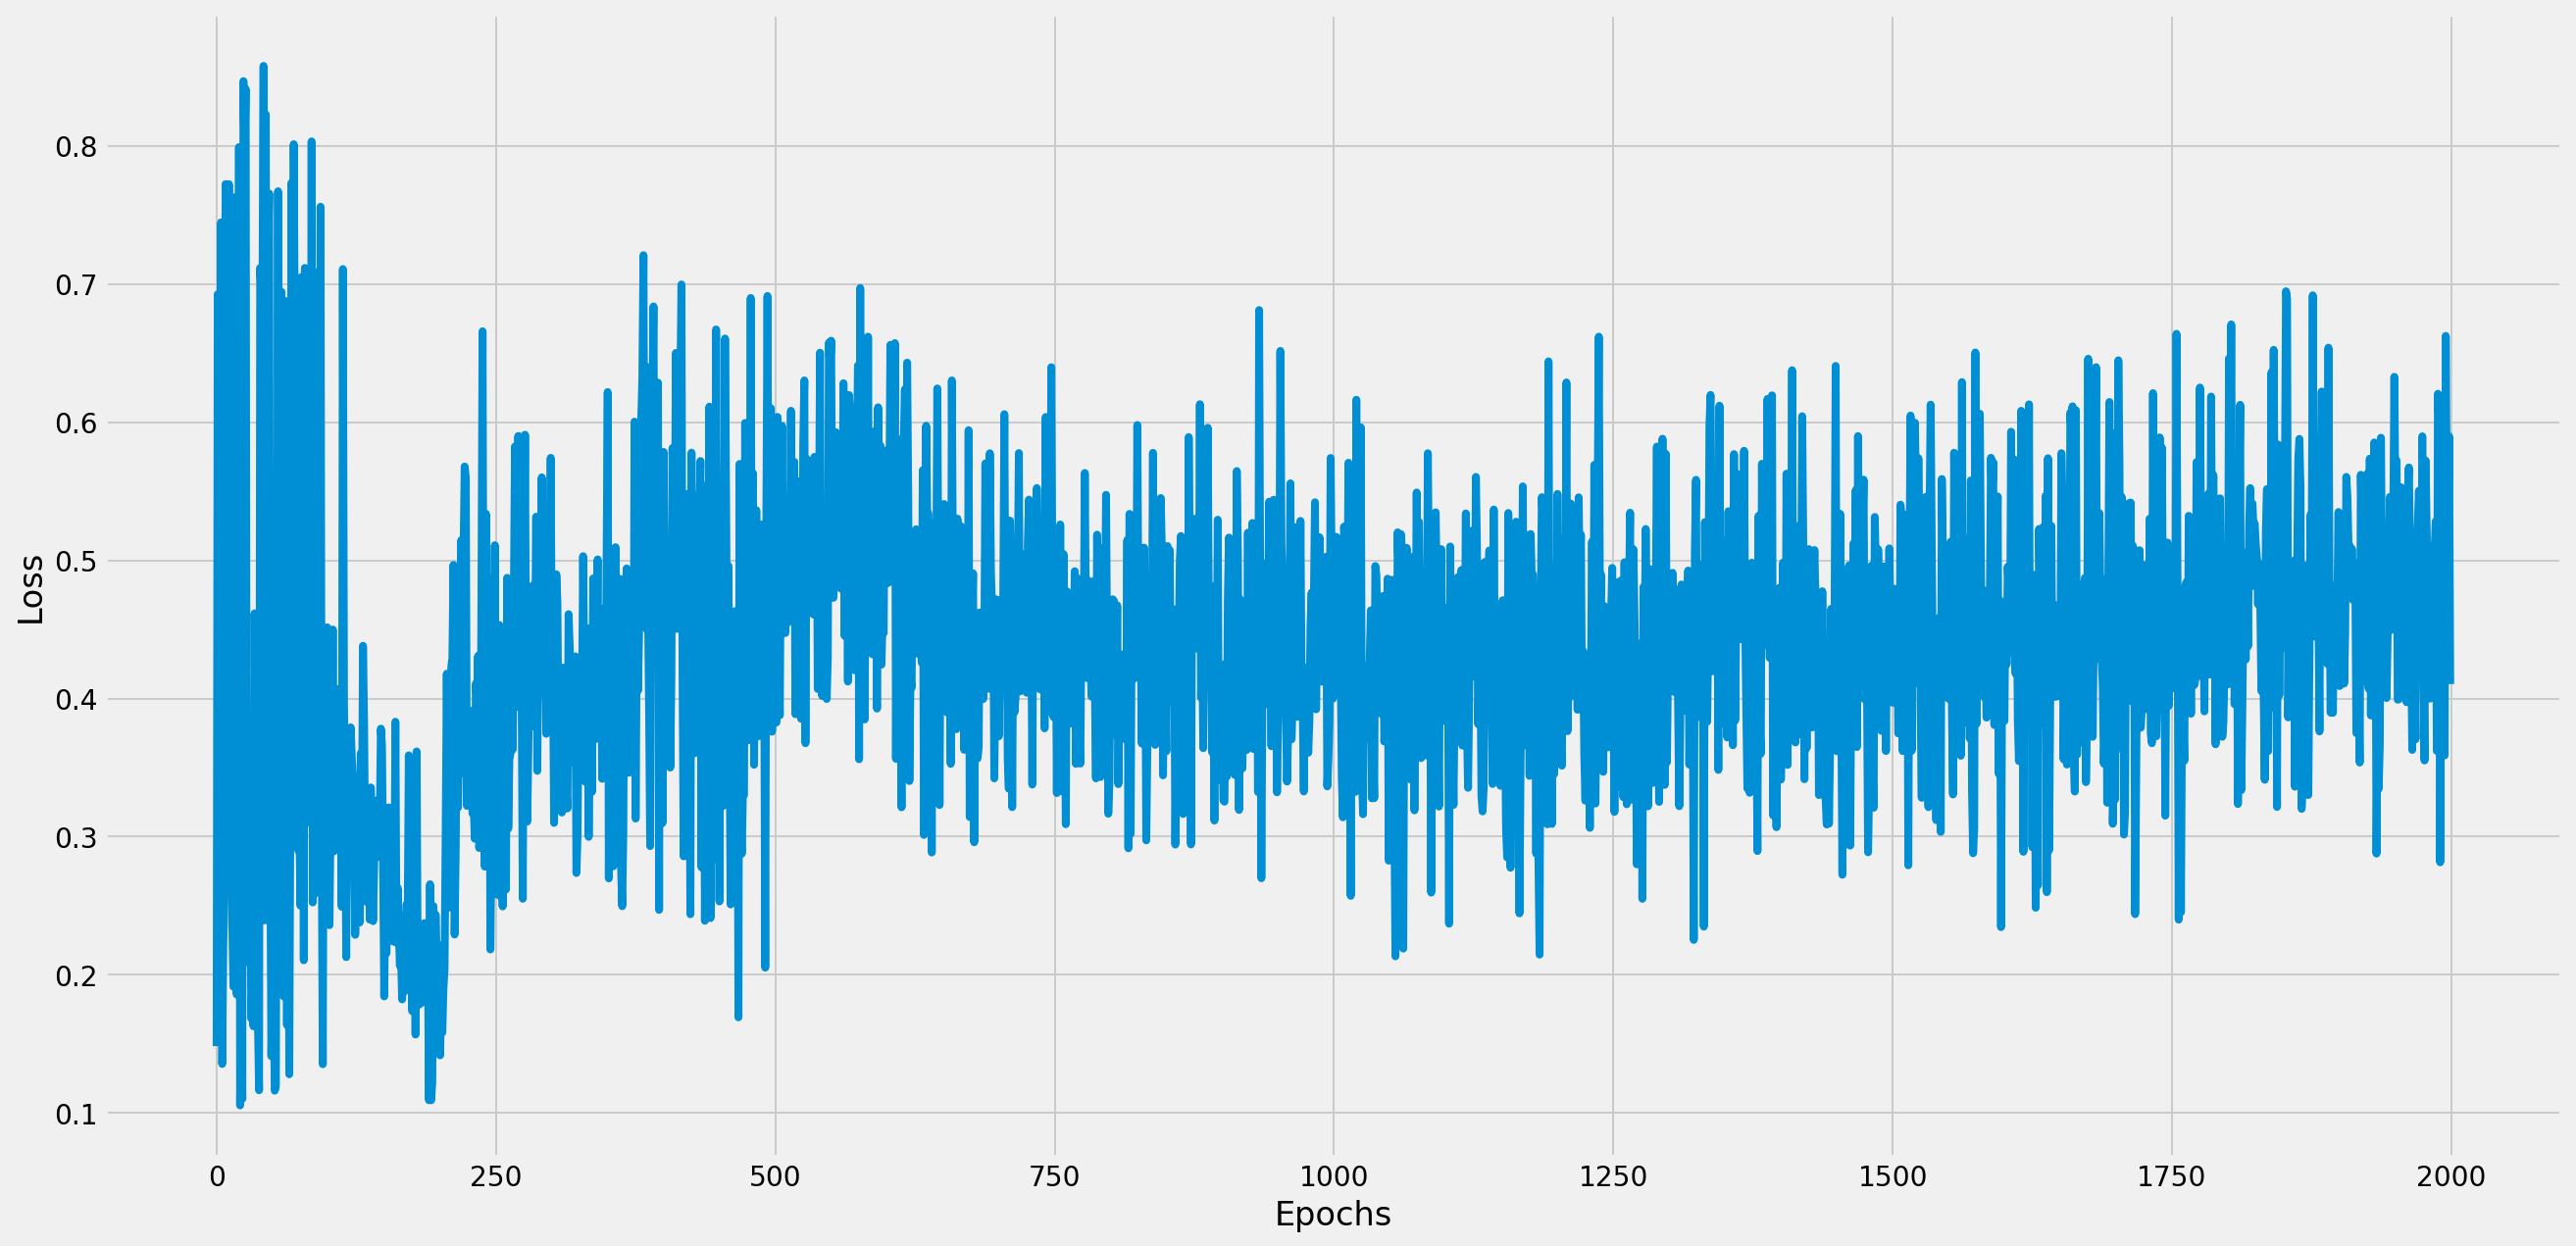

In [33]:
plt.figure(figsize=(20, 10))

plt.plot(d_logs_list3)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

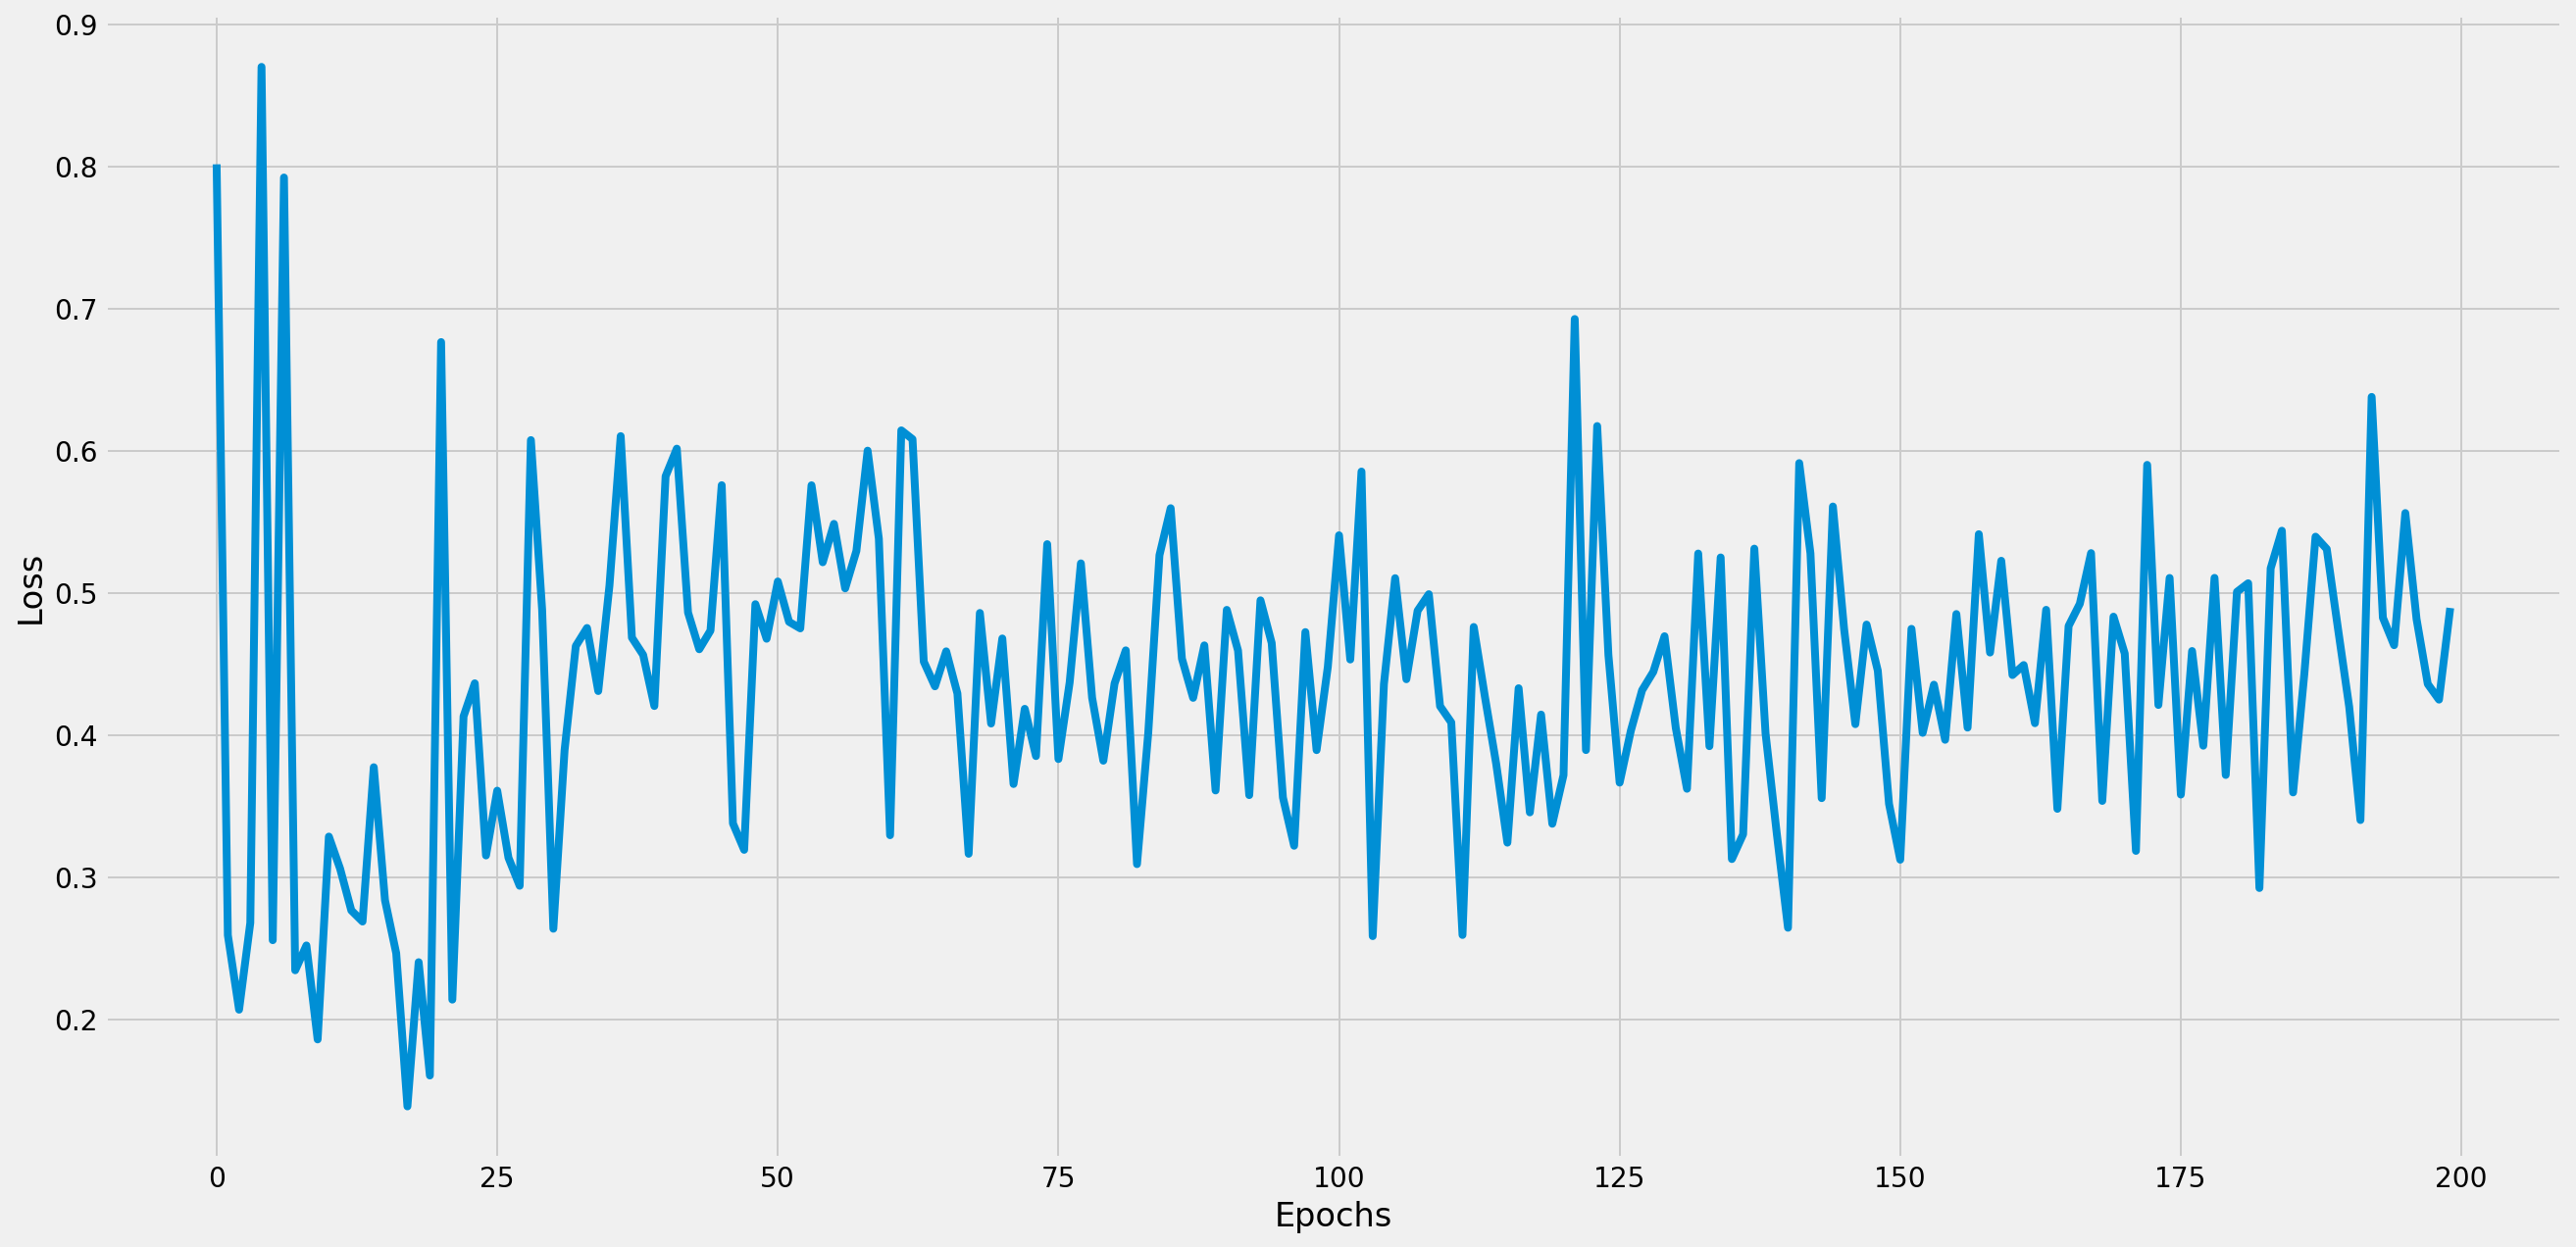

In [34]:
plt.figure(figsize=(20, 10))

plt.plot(g_logs_list3)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

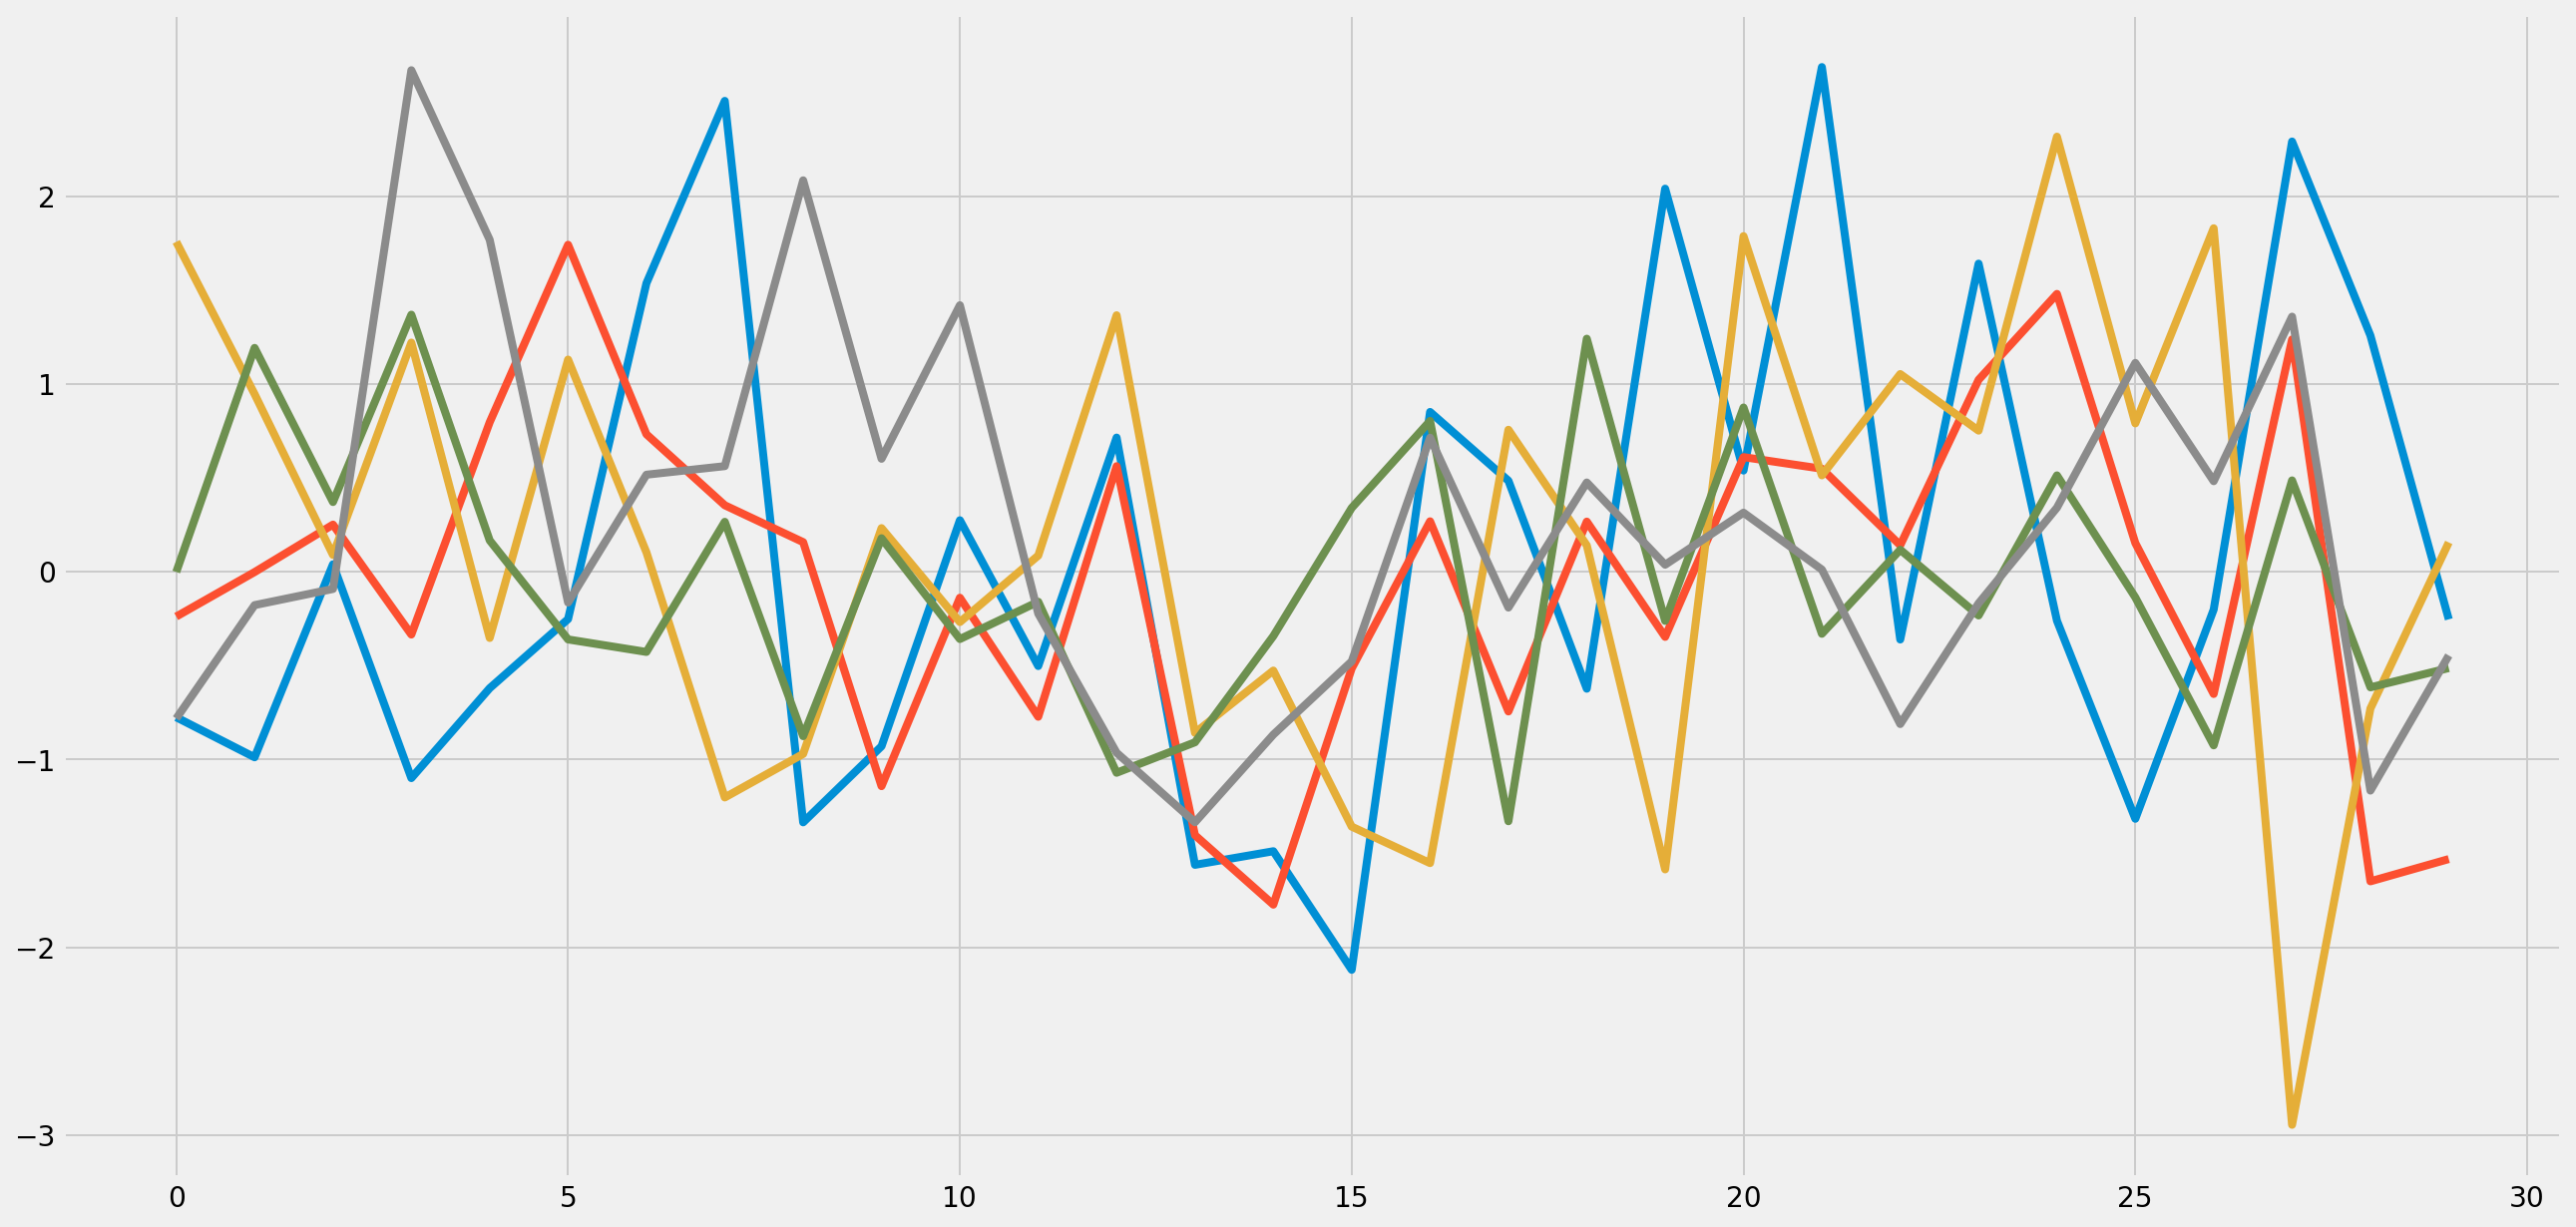

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20, 10))

plt.plot(true_arr[0])
plt.show()

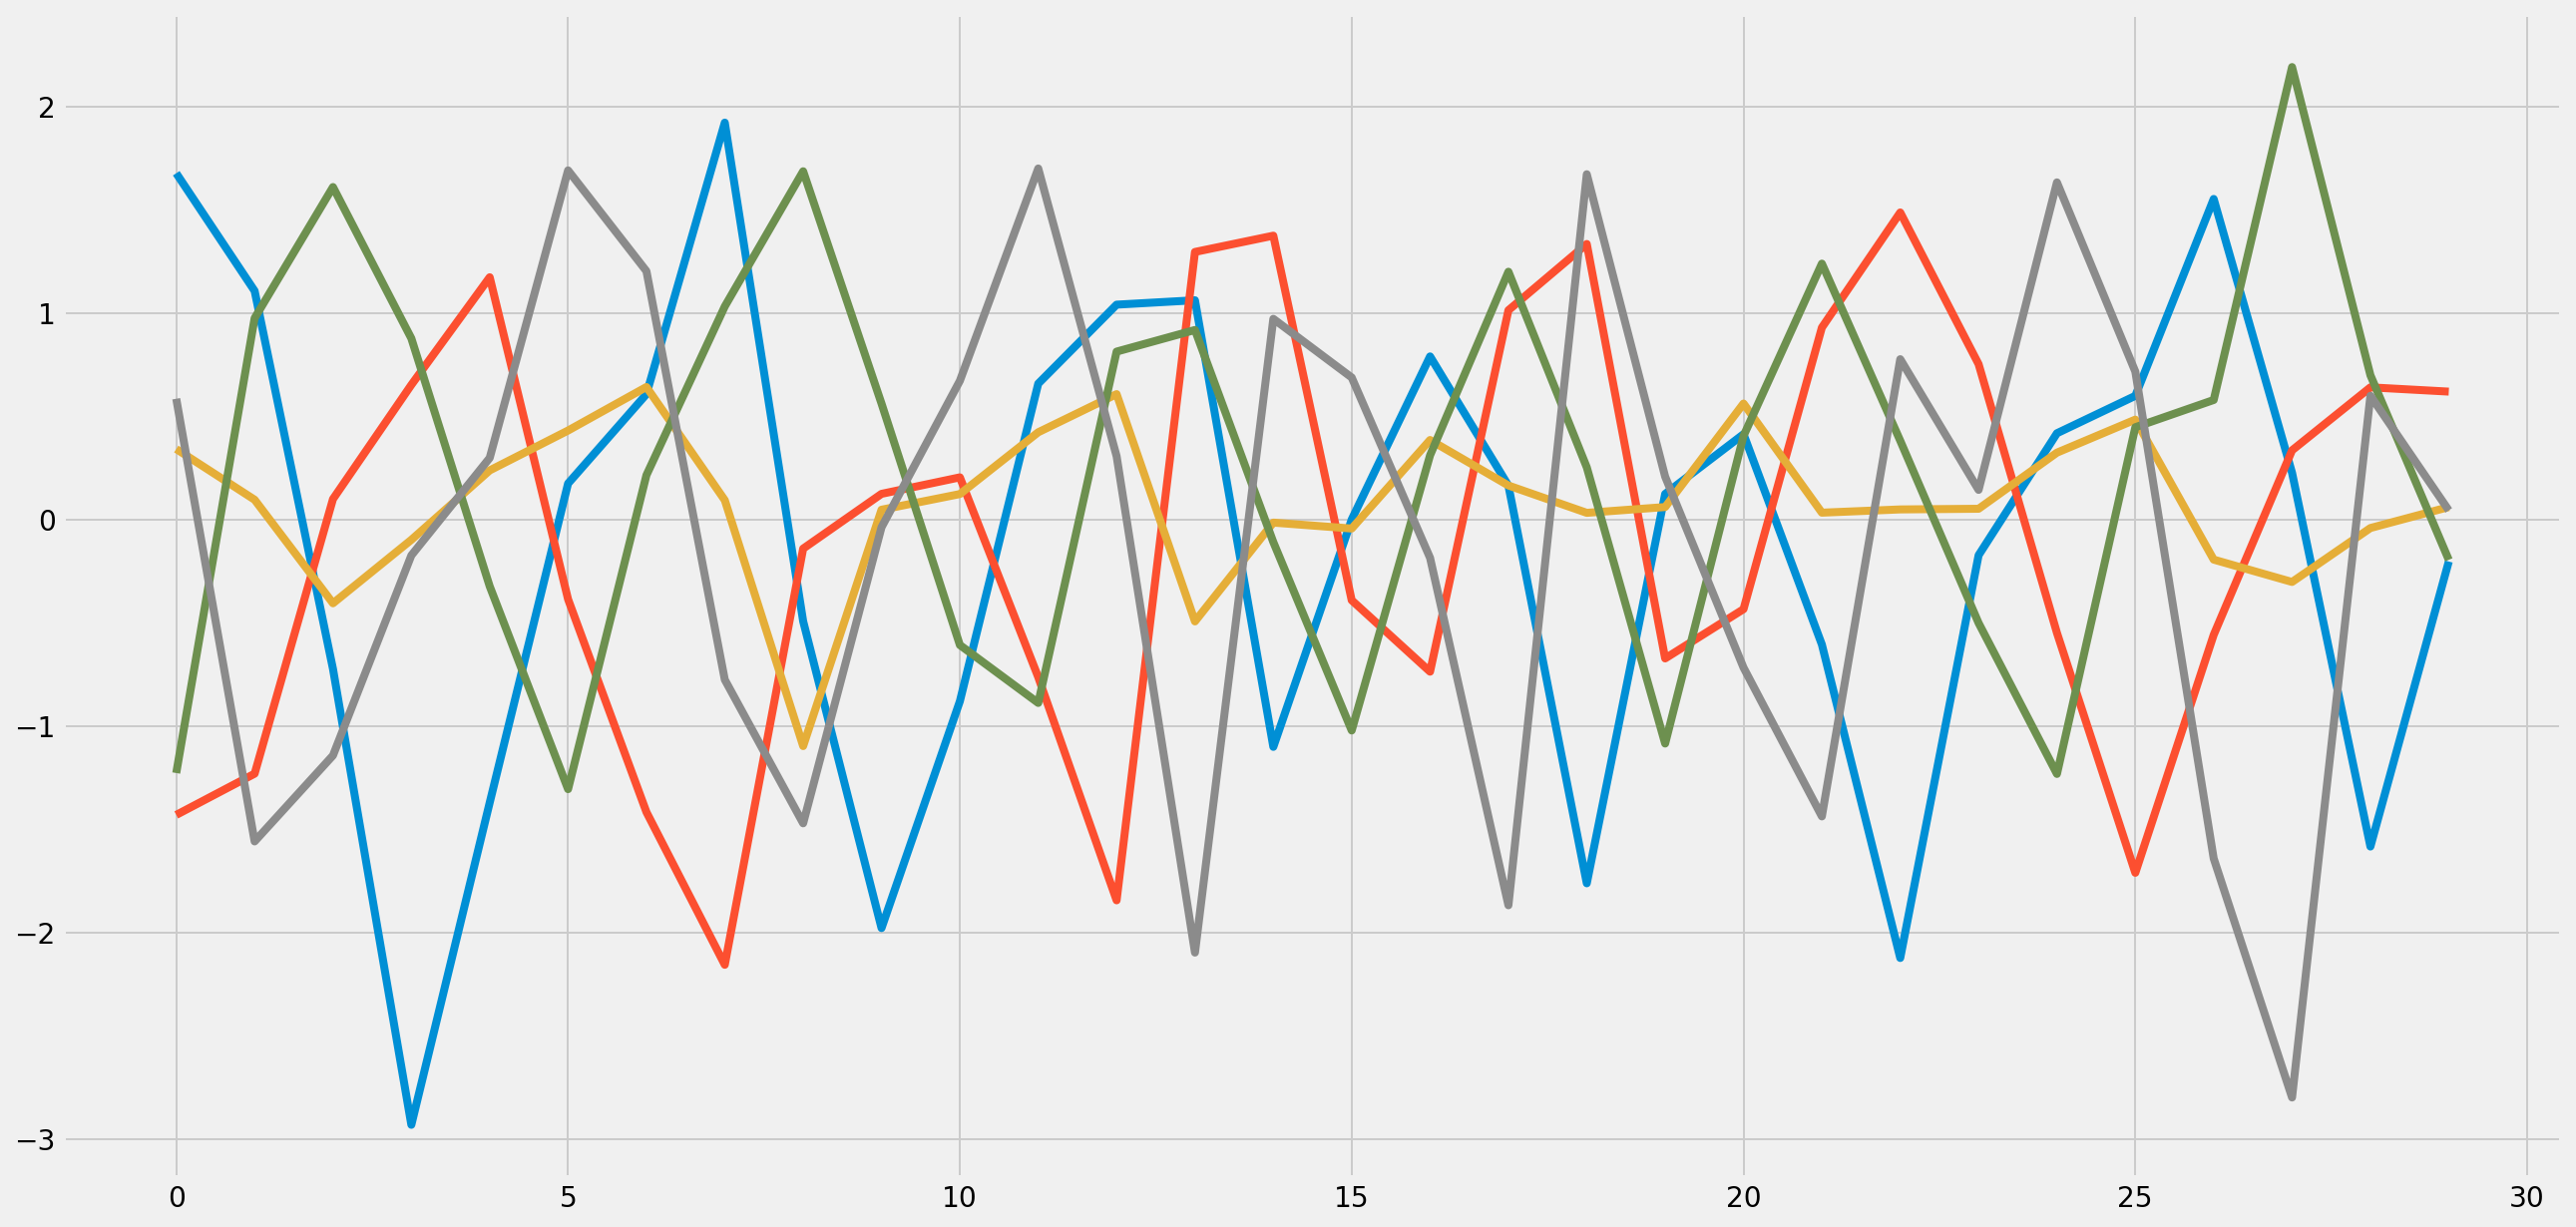

In [36]:
generated_arr = generative_model.draw()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20, 10))

plt.plot(generated_arr[0])
plt.show()